In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nyc-taxi-trip-duration/train.zip
/kaggle/input/nyc-taxi-trip-duration/test.zip
/kaggle/input/nyc-taxi-trip-duration/sample_submission.zip


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# 🔃 Data Loading and Extraction

In [3]:
from pathlib import Path
from zipfile import ZipFile

In [4]:
# paths for the dataset
train_path = '/kaggle/input/nyc-taxi-trip-duration/train.zip'
test_path = '/kaggle/input/nyc-taxi-trip-duration/test.zip'

In [5]:
# output path for the zip files
def extract_zip_file(filepath):
    output_path = Path('/kaggle/working/') / 'raw'
    output_path.mkdir(parents=True,exist_ok=True)
    with ZipFile(file=filepath) as f:
        f.extractall(path=output_path)  
        
# extract the train file
extract_zip_file(train_path)

# extract the test file
extract_zip_file(test_path)

In [6]:
# read the csv files
train_df = pd.read_csv('/kaggle/working/raw/train.csv')
test_df = pd.read_csv('/kaggle/working/raw/test.csv')

print(f'The shape of train file is {train_df.shape}')
print(f'The shape of test file is {test_df.shape}')

The shape of train file is (1458644, 11)
The shape of test file is (625134, 9)


**Data Shape**
- The Train Data has around 1.4 million rows and 11 columns.
- The Test Data has around 625k rows and 9 columns.

# Understanding the Data

In [7]:
train_df.sample(20)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
246170,id2473140,2,2016-05-12 23:51:18,2016-05-12 23:55:01,1,-73.958519,40.710041,-73.947983,40.704319,N,223
489674,id2783531,1,2016-04-12 21:14:55,2016-04-12 21:23:38,1,-73.986855,40.738934,-74.005737,40.747566,N,523
27376,id2568387,2,2016-04-08 11:29:47,2016-04-08 12:09:27,6,-73.863312,40.769932,-73.979362,40.776550,N,2380
209671,id0506527,2,2016-02-29 07:55:59,2016-02-29 07:56:42,2,-73.998711,40.734627,-73.998184,40.735504,N,43
384254,id2467669,1,2016-02-10 20:18:41,2016-02-10 20:24:06,2,-74.002281,40.740528,-74.006844,40.745586,N,325
806020,id0598472,2,2016-05-27 08:45:18,2016-05-27 08:48:28,3,-73.960617,40.769882,-73.955734,40.776512,N,190
804891,id3431463,2,2016-04-13 12:38:23,2016-04-13 12:48:55,5,-73.989220,40.757900,-73.987442,40.775890,N,632
484605,id1498918,1,2016-04-21 23:16:53,2016-04-21 23:47:38,1,-73.974045,40.752911,-73.984726,40.675137,N,1845
109223,id0667518,2,2016-04-14 19:06:11,2016-04-14 19:17:42,1,-73.990082,40.736961,-73.999298,40.721069,N,691
91685,id0824694,1,2016-06-26 21:10:37,2016-06-26 21:20:52,3,-73.983864,40.742668,-73.986115,40.760193,N,615


**About the columns** 💻:
1. **id** - Starts with id and then a bunch of random numbers(7 to be exact).
2. **vendor_id** - Integer column and categorical.
3. **pickup_datetime** - Fmt YYYY-MM-DD HH:MM:SS
4. **dropoff_datetime** - Fmt YYYY-MM-DD HH:MM:SS
5. **passenger_count** - Integer column
6. **pickup_longitude/latitude** - longitude is negative and latitude is positive(above Tropic of Cancer).
7. **dropoff_longitude/latitude** - longitude is negative and latitude is positive(above Tropic of Cancer).
8. **store_and_fwd_flagstore_and_fwd_flag** - String categorical - `Has to be encoded`.
9. **trip_duration** - in seconds

In [8]:
# check for missing values

# train_df
train_df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [9]:
# check for the test data
test_df.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
dtype: int64

In [10]:
# columns to run describe on

cols_to_describe_num = train_df.columns[[5,6,7,8,10]]

cols_to_describe_num

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'trip_duration'],
      dtype='object')

In [11]:
train_df.columns[4:].to_list() + train_df.columns[[1]].to_list()

['passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'store_and_fwd_flag',
 'trip_duration',
 'vendor_id']

In [12]:
# check for duplicate rows in data

train_df.duplicated(subset=(train_df.columns[[1]].to_list() + train_df.columns[4:].to_list())).sum()

9

In [13]:
# description about the data

train_df[cols_to_describe_num].describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


<div style="background-color:#F0B27A ; padding: 20px;">

<span style="font-size: 18px;">
    
**Some Geography Facts**         
Latitude and longitude are a pair of numbers that describe a position on a geographic coordinate system. They are measured in decimal degrees and range from **\[-90 to 90] for latitude** and **\[-180 to 180] for longitude**.
</span>
</div>

In [14]:
train_df[cols_to_describe_num].describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


<div style="background-color: #E6E6FA; padding: 10px;">
    
**About the columns**
- **pickup_longitude** - -121.9(min) and -61.33(max) value are way off the borders of NYC city. The median longitude value is around the -73.9 mark which seems fine. (The -ve sign is correct as NYC lies on the west of the meridian line)
- **pickup_latitude** - The maximum value here which is 51.88 seems to be concerning.(The +ve sign for all values is ok as NYC lies above the equator mark).
- **dropoff_longitude** - 121.9(min) and -61.33(max) value are way off the borders of NYC city. The median longitude value is around the -73.9 mark which seems fine. (The -ve sign is correct as NYC lies on the west of the meridian line).
    - check whether the minimum and maximum are from the same entry for both the pickup and drop. This can indicate a faulty device showing the same coordinates every time.
- **dropoff latitude** - The min value of 32.181 is of concern.

**Target Column** (trip_duration)
- The mean duration is 959 sec and the median is 662 sec. This indicates the column is skewed to the right. (Mean > Median).
- This also indicates the presence of outliers in the data that are skewing the distribution.
- The minimum trip duration value is 1 sec which indicates ride cancelled by the rider or rejected by the driver, after the taxi reached the pickup spot.
- The maximum trip duration of 980 minutes or around 41 days is definitely an outlier and should be handled.
- The Q3 of the data is around 17-18 minutes which shows that people in NYC prefer shorter cab trips.
    
</div>

In [15]:
(1.075000e+03 * 60) / 3600

17.916666666666668

**Points to Ponder**:
Check the minimum and maximum values of latitude and longitude and check whether they are outliers?
- Check the extreme longitude and latitude values.
- Trip timings for one booking is around 41 days -- An Outlier.

In [16]:
# statistical summary for the categorical columns

cols_to_describe_cat = [col for col in train_df.columns if col not in cols_to_describe_num]
cols_to_describe_cat = np.array(cols_to_describe_cat)[[1,4,5]]
cols_to_describe_cat

array(['vendor_id', 'passenger_count', 'store_and_fwd_flag'], dtype='<U18')

In [17]:
# value counts of each categorical column 

for col in cols_to_describe_cat:
    print(f'The unique value in {col} are ---->',np.sort(train_df[col].unique()))
    print(train_df[col].value_counts())
    print('*' * 100,end='\n')

The unique value in vendor_id are ----> [1 2]
vendor_id
2    780302
1    678342
Name: count, dtype: int64
****************************************************************************************************
The unique value in passenger_count are ----> [0 1 2 3 4 5 6 7 8 9]
passenger_count
1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: count, dtype: int64
****************************************************************************************************
The unique value in store_and_fwd_flag are ----> ['N' 'Y']
store_and_fwd_flag
N    1450599
Y       8045
Name: count, dtype: int64
****************************************************************************************************


**Things to investigate**:
1. What does it mean to have 0 passengers in the cab.
2. Remove the passengers 7 to 9 from the data as they are only 5 data points in our training data.
3. It is hard to imagine 7, 8 or 9 passengers in a single cab. Maybe it can be a luxury car or a mini van sort of taxi.

In [18]:
# datatypes of train data

train_df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [19]:
# info about the data frame

train_df.info(memory_usage='deep',show_counts=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   id                  object 
 1   vendor_id           int64  
 2   pickup_datetime     object 
 3   dropoff_datetime    object 
 4   passenger_count     int64  
 5   pickup_longitude    float64
 6   pickup_latitude     float64
 7   dropoff_longitude   float64
 8   dropoff_latitude    float64
 9   store_and_fwd_flag  object 
 10  trip_duration       int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 461.8 MB


**The memory usage is 461.8 MB**

In [20]:
# # convert the big sized integer columns to small size

# train_df['vendor_id'] = train_df['vendor_id'].astype(np.int8)
# train_df['passenger_count'] = train_df['vendor_id'].astype(np.int32)

In [21]:
#train_df.info(memory_usage='deep',show_counts=False)

**Convert data types**
1. id - remove 'id' and make it numerical.
2. pickup_datetime - change to datetime
3. dropoff_datetime - change to datetime

# EDA(Exploratory Data Analysis)

In [22]:
# train_df columns
train_df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

## Target Column --> Trip Duration

#### Target column in seconds

In [23]:
# dtype of target column

train_df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [24]:
# statistical description of the target column

target_col = 'trip_duration'

train_df[target_col].describe().reset_index()

,index,trip_duration
0,count,1.458644e+06
1,mean,9.594923e+02
2,std,5.237432e+03
3,min,1.000000e+00
4,25%,3.970000e+02
5,50%,6.620000e+02
6,75%,1.075000e+03
7,max,3.526282e+06


In [25]:
# number of trips in the target column that have durations less than 1 minute or 60 seconds

train_df[target_col].loc[train_df[target_col] <= 60].size

8777

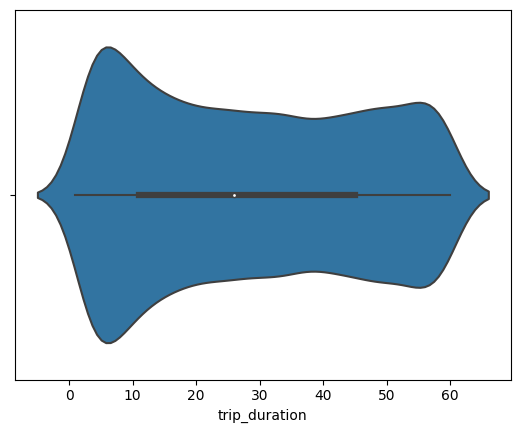

In [26]:
# distribution of target column of trips less than a minute

sns.violinplot(x=train_df[target_col].loc[train_df[target_col] <= 60],)
plt.show()

In [27]:
# trip durations equal to 1 sec

train_df.loc[train_df[target_col] == 1]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
35196,id2536510,1,2016-04-17 11:44:49,2016-04-17 11:44:50,1,-73.940384,40.786423,-73.940300,40.786373,N,1
207497,id1520236,1,2016-05-17 09:03:38,2016-05-17 09:03:39,1,-73.819893,40.740822,-73.819885,40.740822,N,1
269418,id0553321,2,2016-04-11 19:01:35,2016-04-11 19:01:36,1,-73.945999,40.792202,-73.947411,40.792740,N,1
279493,id1491861,1,2016-04-24 11:35:40,2016-04-24 11:35:41,1,-73.841423,40.695278,-73.841423,40.695274,N,1
285635,id0075470,1,2016-03-07 16:12:28,2016-03-07 16:12:29,1,-73.980690,40.744419,-73.980690,40.744419,N,1
311745,id2959956,1,2016-02-25 04:26:50,2016-02-25 04:26:51,1,-73.806152,40.660206,-73.806267,40.660049,N,1
346102,id2375785,1,2016-01-15 23:57:18,2016-01-15 23:57:19,1,-73.985825,40.755760,-73.985901,40.755829,N,1
346959,id1171557,1,2016-02-10 16:33:43,2016-02-10 16:33:44,1,-73.776512,40.646454,-73.776512,40.646454,N,1
404610,id3686648,1,2016-01-29 11:18:55,2016-01-29 11:18:56,1,-73.971954,40.750137,-73.971985,40.750130,N,1
451396,id2836747,1,2016-01-26 10:47:22,2016-01-26 10:47:23,1,-74.001610,40.737450,-74.001610,40.737450,N,1


#### Target Column in minutes

In [28]:
# convert the trip duration col to minutes for easier understanding

target_col_minutes = train_df[target_col] / 60

target_col_minutes.describe().reset_index()

,index,trip_duration
0,count,1.458644e+06
1,mean,1.599154e+01
2,std,8.729053e+01
3,min,1.666667e-02
4,25%,6.616667e+00
5,50%,1.103333e+01
6,75%,1.791667e+01
7,max,5.877137e+04


**Key Points**:
1. The mean ride time is around 16 min.
2. The median is 11 min. Mean is greater than Median means that the variable is right skewed.
3. 75th percentile value is 18 min.
4. The min value is 0 to 1 sec.
5. The max is 41 days or 5877 min.

<Axes: xlabel='trip_duration', ylabel='Density'>

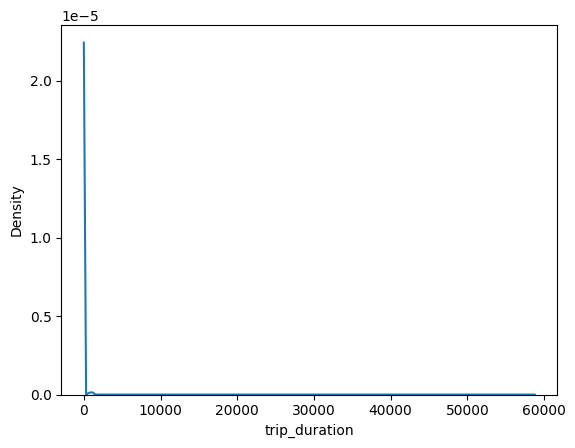

In [29]:
# distribution 

import matplotlib.pyplot as plt
import seaborn as sns

sns.kdeplot(target_col_minutes)

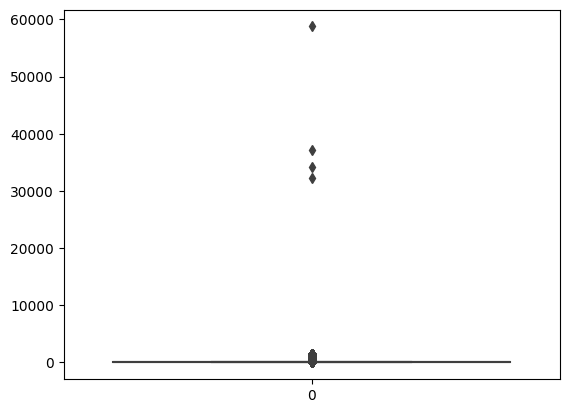

In [30]:
# box plot

sns.boxplot(target_col_minutes)
plt.show()

In [31]:
(60000/ 60) / 24

41.666666666666664

In [32]:
# extreme points in the data (results in hours)

target_col_minutes[target_col_minutes > 5000] / 60

355003    538.815556
680594    569.327222
924150    618.781111
978383    979.522778
Name: trip_duration, dtype: float64

In [33]:
# extreme points in the complete data

train_df[target_col_minutes > 5000]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
355003,id1864733,1,2016-01-05 00:19:42,2016-01-27 11:08:38,1,-73.789650,40.643559,-73.956810,40.773087,N,1939736
680594,id0369307,1,2016-02-13 22:38:00,2016-03-08 15:57:38,2,-73.921677,40.735252,-73.984749,40.759979,N,2049578
924150,id1325766,1,2016-01-05 06:14:15,2016-01-31 01:01:07,1,-73.983788,40.742325,-73.985489,40.727676,N,2227612
978383,id0053347,1,2016-02-13 22:46:52,2016-03-25 18:18:14,1,-73.783905,40.648632,-73.978271,40.750202,N,3526282


In [34]:
# drop the extreme points in the data

target_col_minutes.drop(index=target_col_minutes[target_col_minutes > 5000].index,inplace=True)

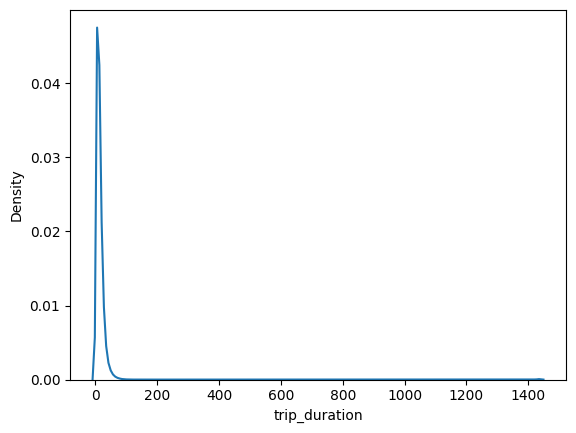

In [35]:
sns.kdeplot(target_col_minutes)
plt.show()

In [36]:
target_col_minutes.describe().reset_index()

,index,trip_duration
0,count,1.458640e+06
1,mean,1.588025e+01
2,std,5.285537e+01
3,min,1.666667e-02
4,25%,6.616667e+00
5,50%,1.103333e+01
6,75%,1.791667e+01
7,max,1.439867e+03


In [37]:
1400 / 60

23.333333333333332

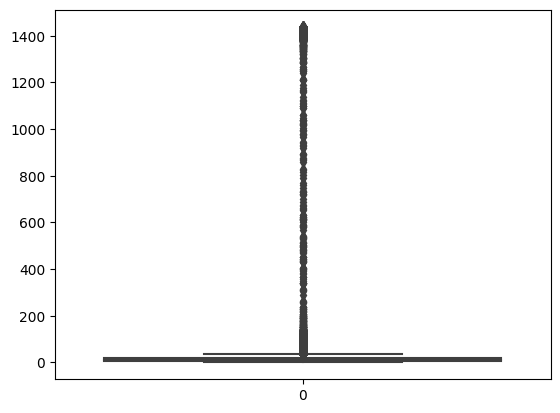

In [38]:
# box plot

sns.boxplot(target_col_minutes)
plt.show()

#### Target column in hours

In [39]:
# converting the target column to hours

target_hours = train_df['trip_duration'] / 3600

target_hours

0          0.126389
1          0.184167
2          0.590000
3          0.119167
4          0.120833
             ...   
1458639    0.216111
1458640    0.181944
1458641    0.212222
1458642    0.103611
1458643    0.055000
Name: trip_duration, Length: 1458644, dtype: float64

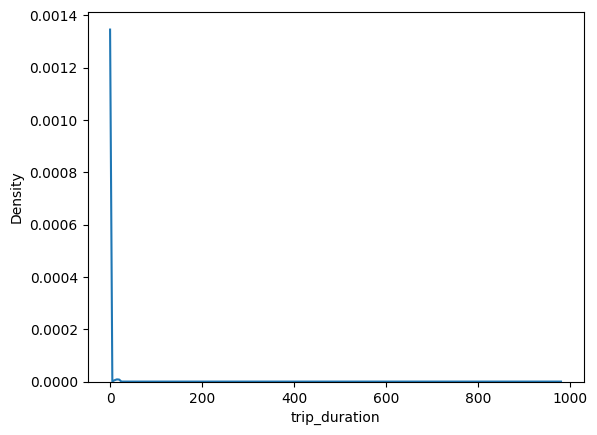

In [40]:
# distribution of target column when converted to hours

sns.kdeplot(target_hours)
plt.show()

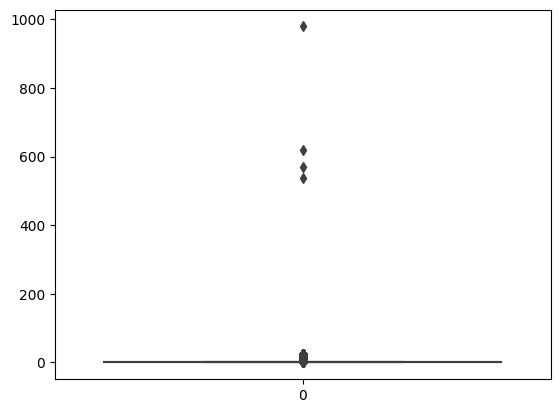

In [41]:
# box plot

sns.boxplot(target_hours)
plt.show()

In [42]:
# calculate the upper limit based on the IQR approach

Q1_target, Q3_target = target_hours.quantile([0.25,0.75])
IQR = Q3_target - Q1_target

print(f'Q1={Q1_target*60:.2f} minutes    ',f'Q3={Q3_target*60:.2f} minutes')
print(f'IQR={IQR*60:.2f} minutes')

upper_bound_target = Q3_target +  (1.5 * IQR)
print(f'Upper Bound={upper_bound_target*60:.2f} minutes')

Q1=6.62 minutes     Q3=17.92 minutes
IQR=11.30 minutes
Upper Bound=34.87 minutes


In [43]:
(target_hours > upper_bound_target)

0          False
1          False
2           True
3          False
4          False
           ...  
1458639    False
1458640    False
1458641    False
1458642    False
1458643    False
Name: trip_duration, Length: 1458644, dtype: bool

In [44]:
# distribution of pickup latitude and logitude of above upper limit

x_temp = train_df.loc[(target_hours > upper_bound_target),:].copy()

x_temp.loc[:,'trip_duration'] = x_temp['trip_duration'] / 3600

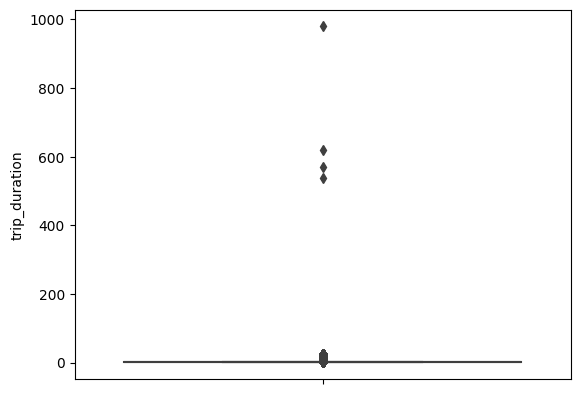

In [45]:
# boxplot for the target column

sns.boxplot(data=x_temp,y='trip_duration')
plt.show()

In [46]:
# remove the extreme points

drop_indices = x_temp[x_temp['trip_duration'] > 100].index
drop_indices

Index([355003, 680594, 924150, 978383], dtype='int64')

In [47]:
# drop the extreme points

x_temp.drop(index=drop_indices,inplace=True)

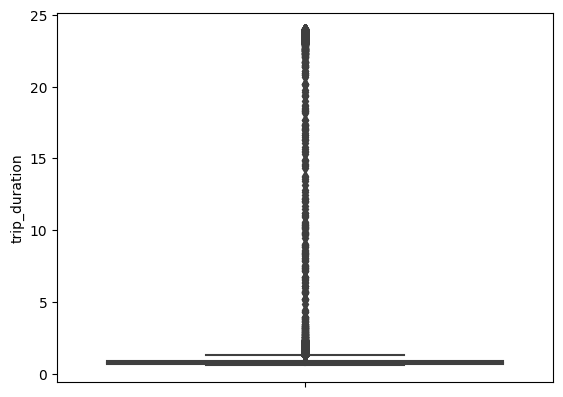

In [48]:
# boxplot for the target column

sns.boxplot(data=x_temp,y='trip_duration')
plt.show()

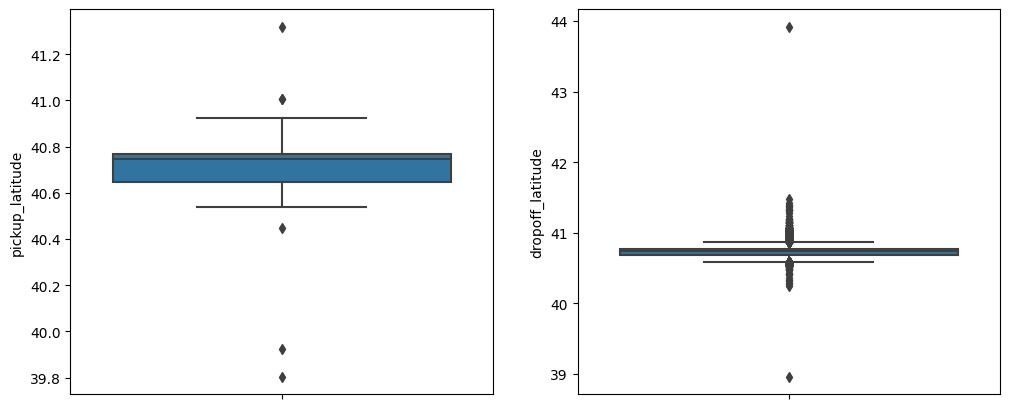

In [49]:
# boxplot for latitudes

fig = plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_temp,y='pickup_latitude')
plt.subplot(1,2,2)
sns.boxplot(data=x_temp,y='dropoff_latitude')
plt.show()

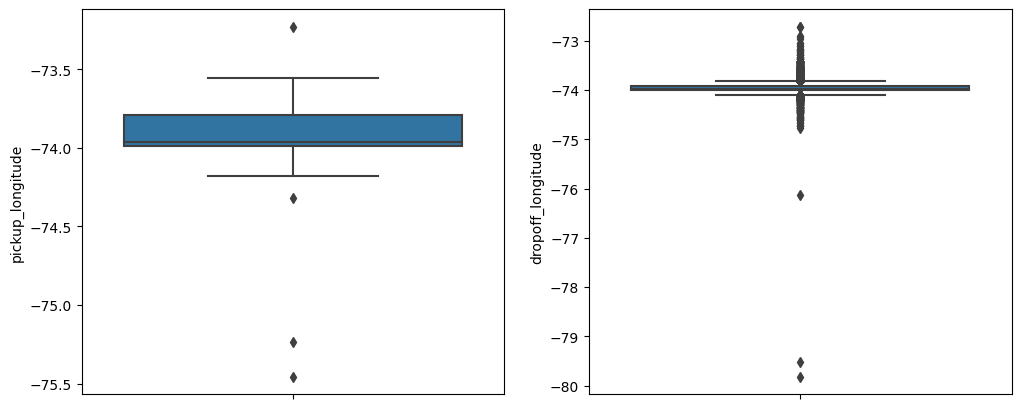

In [50]:
# boxplot for longitudes

fig = plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_temp,y='pickup_longitude')
plt.subplot(1,2,2)
sns.boxplot(data=x_temp,y='dropoff_longitude')
plt.show()

In [51]:
def detect_outliers(data,columns,fold=1.5):
    data_temp = data.copy()
    new_df = pd.DataFrame(columns=columns)
    for col in columns:
        Q1, Q3 = data_temp[col].quantile([0.25,0.75])
        IQR = Q3 - Q1
        upper_bound = Q3 +  (fold * IQR)
        lower_bound = Q1 -  (fold * IQR)
        filter_data = data_temp.loc[(data_temp[col] <= lower_bound) | (data_temp[col] >= upper_bound)]
        new_df = pd.concat([new_df,filter_data])
    
    return new_df

In [52]:
# outliers in co ordinates

detect_outliers(data=x_temp,columns=['pickup_latitude'])

,pickup_latitude,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
66344,41.006001,id0240882,1.0,2016-03-11 11:09:48,2016-03-11 12:36:54,1.0,-73.688805,-74.005753,40.725510,N,1.451667
73414,41.319164,id0098463,1.0,2016-03-30 19:32:16,2016-03-30 20:25:26,2.0,-74.126724,-73.935120,40.829666,N,0.886111
114376,39.803932,id1311087,1.0,2016-02-29 12:16:29,2016-02-29 18:47:09,3.0,-75.455917,-73.796021,40.707726,N,6.511111
981237,40.446159,id2004335,2.0,2016-05-02 23:45:19,2016-05-03 00:48:37,1.0,-74.317749,-73.987099,40.723618,N,1.055000
1226891,41.003960,id2571106,1.0,2016-01-17 17:10:42,2016-01-17 17:47:33,1.0,-73.682144,-73.913017,40.767632,Y,0.614167
1416336,39.923027,id3795134,1.0,2016-03-21 20:54:00,2016-03-22 01:43:23,3.0,-75.238327,-73.922577,40.610130,N,4.823056


In [53]:
# outliers in co ordinates

detect_outliers(data=x_temp,columns=['dropoff_latitude'],fold=5)

,dropoff_latitude,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,store_and_fwd_flag,trip_duration
14502,41.311520,id1092161,1.0,2016-04-15 22:35:08,2016-04-16 00:34:21,1.0,-73.781792,40.644718,-72.711395,N,1.986944
108729,41.181141,id2000225,2.0,2016-01-15 20:25:02,2016-01-15 21:10:39,1.0,-73.863182,40.769417,-73.849640,N,0.760278
112247,41.334740,id0479538,1.0,2016-01-02 20:50:36,2016-01-02 22:18:34,1.0,-73.789871,40.643410,-73.684250,N,1.466111
136925,41.143021,id1493150,2.0,2016-02-28 22:13:20,2016-02-28 23:31:55,2.0,-73.990723,40.749851,-73.258476,N,1.309722
189789,41.197395,id2172310,2.0,2016-06-08 17:25:27,2016-06-08 18:44:37,1.0,-73.872871,40.774067,-73.725464,N,1.319444
231336,41.201595,id2108994,1.0,2016-05-19 11:29:19,2016-05-19 12:38:19,1.0,-73.788795,40.642273,-73.684677,N,1.150000
236614,40.293289,id3765151,1.0,2016-04-09 12:20:12,2016-04-09 13:28:22,1.0,-73.992142,40.751850,-74.647537,N,1.136111
273277,41.134434,id3572837,2.0,2016-01-27 23:01:44,2016-01-27 23:49:33,1.0,-73.996887,40.744556,-73.854599,N,0.796944
396966,41.480755,id3476102,1.0,2016-02-19 20:03:37,2016-02-19 21:32:20,1.0,-73.784843,40.648506,-73.625992,N,1.478611
397526,38.963852,id0982904,1.0,2016-04-28 13:32:14,2016-04-28 14:14:09,2.0,-73.870682,40.773598,-79.817978,N,0.698611


In [54]:
x_temp['passenger_count'].value_counts()

passenger_count
1    49654
2    12682
5     4224
3     3338
6     2528
4     1786
0        4
Name: count, dtype: int64

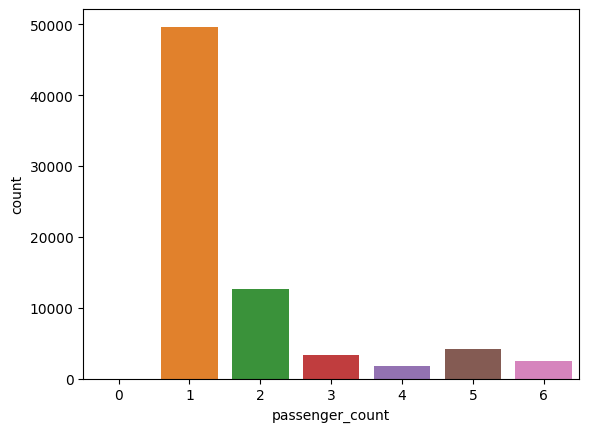

In [55]:
# distribution of passenger count

sns.countplot(data=x_temp,x='passenger_count')
plt.show()

In [56]:
# rides where the passenger count was 0

x_temp[x_temp['passenger_count'] == 0]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
62744,id3917283,2,2016-06-06 16:39:09,2016-06-07 16:30:50,0,-73.776367,40.645248,-73.776360,40.645260,N,23.861389
217765,id3762593,1,2016-01-04 12:24:17,2016-01-04 13:01:48,0,-73.815224,40.700081,-73.950699,40.755222,N,0.625278
676906,id0878599,1,2016-01-25 08:46:58,2016-01-25 09:41:01,0,-73.928078,40.736412,-73.985519,40.758972,N,0.900833
1257574,id1205792,1,2016-03-11 12:33:17,2016-03-11 13:09:48,0,-73.982063,40.763798,-74.188072,40.694042,N,0.608611


In [57]:
# passenger count and vendor id

pd.crosstab(index=x_temp['passenger_count'],columns=x_temp['vendor_id'],normalize='columns') * 100

vendor_id,1,2
passenger_count,,
0,0.009223,0.002399
1,72.649021,62.422338
2,19.677826,15.067047
3,4.595899,4.421043
4,2.914323,2.010219
5,0.104522,10.051095
6,0.049187,6.025859


In [58]:
# trip durations summary

x_temp.pivot_table(index='passenger_count',columns='vendor_id',values='trip_duration',aggfunc=['min','max','median','mean'])

min                   max               median  \
vendor_id               1          2          1          2         1   
passenger_count                                                        
0                0.608611  23.861389   0.900833  23.861389  0.625278   
1                0.581389   0.581389  14.548889  23.997500  0.715278   
2                0.581389   0.581389   3.393889  23.997778  0.738611   
3                0.581389   0.581389   6.511111  23.990278  0.737222   
4                0.581389   0.582222   2.756111  23.994167  0.762778   
5                0.592222   0.581389   3.198056  23.993889  0.789167   
6                0.613056   0.581389   1.289722  23.993611  0.775139   

                                mean             
vendor_id                2         1          2  
passenger_count                                  
0                23.861389  0.711574  23.861389  
1                 0.737778  0.785198   1.849816  
2                 0.746111  0.806634   1.872925  
3                 0.730556  0.815239   2.195668  
4                 0.741944  0.825782   2.307446  
5                 0.733194  0.910417   1.925607  
6                 0.739583  0.849201   1.964516

The maximum trip duration in vendor 2 nears toward 1 day as compared to vendor 1.   
This suggests that for longer trips people prefer vendor 2 as compared to vendor 1

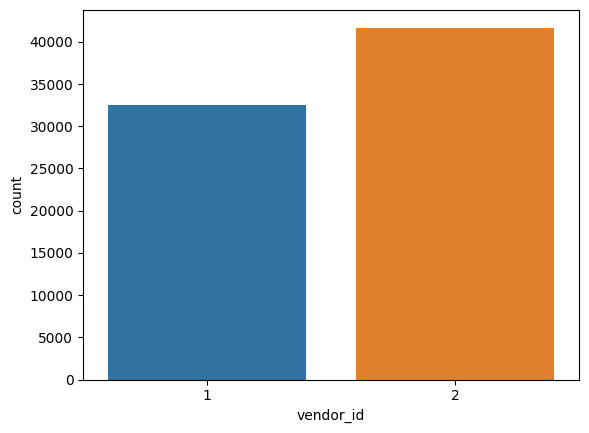

In [59]:
# distribution of passenger count

sns.countplot(data=x_temp,x='vendor_id')
plt.show()

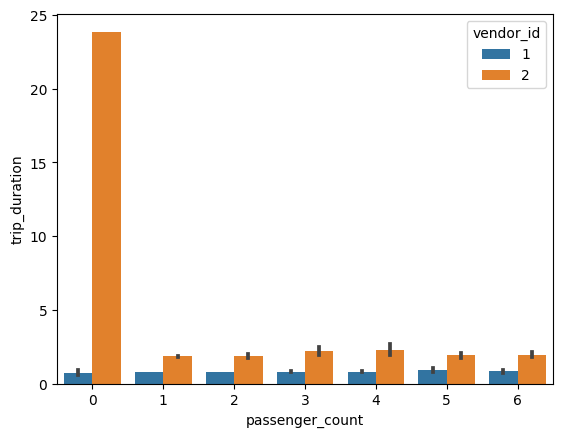

In [60]:
# avg trip duration in hours based on passenger count

sns.barplot(data=x_temp,x='passenger_count',y='trip_duration',hue='vendor_id')
plt.show()

---------

In [61]:
# aggregate stats
target_col_minutes.agg(func=['mean','median','min','max'])

mean        15.880254
median      11.033333
min          0.016667
max       1439.866667
Name: trip_duration, dtype: float64

The value for percentile=90.00 : 27.23 minutes
The value for percentile=91.00 : 28.38 minutes
The value for percentile=92.00 : 29.67 minutes
The value for percentile=93.00 : 31.15 minutes
The value for percentile=94.00 : 32.92 minutes
The value for percentile=95.00 : 35.07 minutes
The value for percentile=96.00 : 37.88 minutes
The value for percentile=97.00 : 41.62 minutes
The value for percentile=98.00 : 47.15 minutes
The value for percentile=99.00 : 57.33 minutes


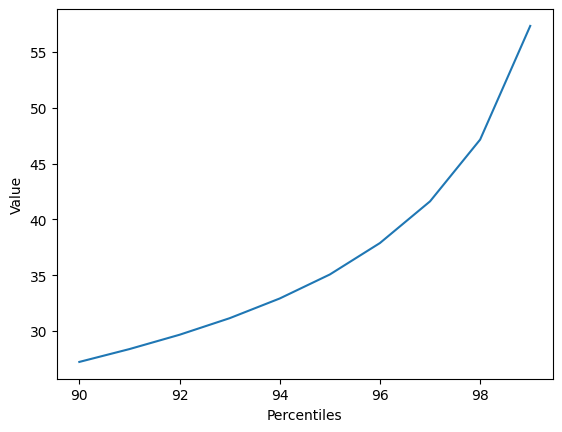

In [62]:
# print percentile values in data
percentiles = np.arange(0.9,1,0.01)
res_list = []
for quant in percentiles:
    res = target_col_minutes.quantile(quant)
    res_list.append(res)
    print(f'The value for percentile={quant*100 :.2f} : {res :.2f} minutes')
    
# plot the graph
plt.plot(percentiles*100,res_list)
plt.xlabel('Percentiles')
plt.ylabel('Value')
plt.show()

The value for percentile=99.00 : 57.33
The value for percentile=99.10 : 59.00
The value for percentile=99.20 : 60.87
The value for percentile=99.30 : 63.03
The value for percentile=99.40 : 65.69
The value for percentile=99.50 : 68.98
The value for percentile=99.60 : 73.37
The value for percentile=99.70 : 79.38
The value for percentile=99.80 : 92.48
The value for percentile=99.90 : 1418.67
The value for percentile=100.00 : 1439.87


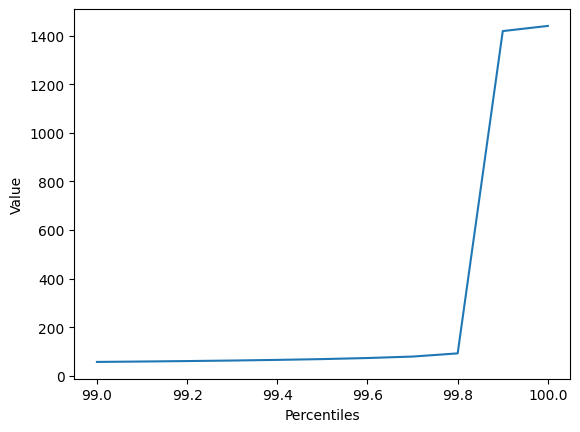

In [63]:
# print percentile values in data
percentiles = np.arange(0.99,1,0.001)
res_list = []

for quant in percentiles:
    res = target_col_minutes.quantile(quant)
    res_list.append(res)
    print(f'The value for percentile={quant*100 :.2f} : {res :.2f}')
    
# plot the graph
plt.plot(percentiles*100,res_list)
plt.xlabel('Percentiles')
plt.ylabel('Value')
plt.show()

The value for percentile=99.80 : 92.48
The value for percentile=99.81 : 95.13
The value for percentile=99.82 : 98.25
The value for percentile=99.83 : 103.02
The value for percentile=99.84 : 110.31
The value for percentile=99.85 : 133.00
The value for percentile=99.86 : 436.64
The value for percentile=99.87 : 1331.58
The value for percentile=99.88 : 1390.89
The value for percentile=99.89 : 1409.11
The value for percentile=99.90 : 1418.67
The value for percentile=99.91 : 1424.39
The value for percentile=99.92 : 1428.08
The value for percentile=99.93 : 1431.05
The value for percentile=99.94 : 1433.45
The value for percentile=99.95 : 1435.03
The value for percentile=99.96 : 1436.29
The value for percentile=99.97 : 1437.38
The value for percentile=99.98 : 1438.14
The value for percentile=99.99 : 1438.75
The value for percentile=100.00 : 1439.87


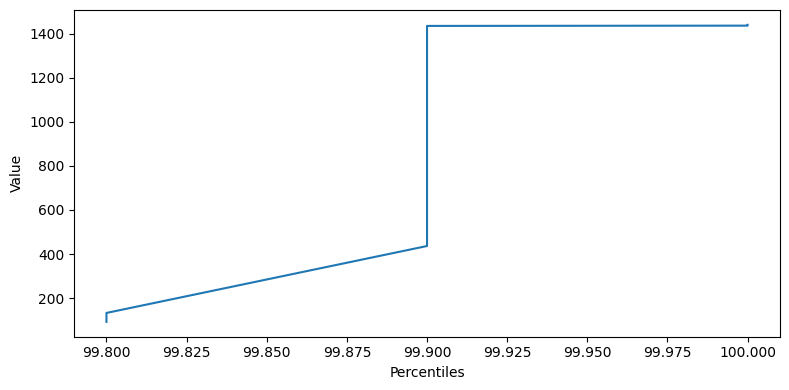

In [64]:
# print percentile values in data
percentiles = np.arange(0.998,1,0.0001)
res_list = []

for quant in percentiles:
    res = target_col_minutes.quantile(quant)
    res_list.append(res)
    print(f'The value for percentile={quant*100 :.2f} : {res :.2f}')

# plot the graph
plt.figure(figsize=(8,4))
plt.plot(np.round((percentiles*100),1),res_list)
plt.xlabel('Percentiles')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

In [65]:
# number of data points above or equal to the 100 minutes mark

time_ranges = np.arange(100,1100,100)
prev_val = 0
for time in time_ranges:
    new_val = target_col_minutes[target_col_minutes >= time].size
    print(f'{time} = {new_val}      diff={np.abs(new_val-prev_val)}')
    prev_val = new_val

100 = 2563      diff=2563
200 = 2092      diff=471
300 = 2068      diff=24
400 = 2049      diff=19
500 = 2028      diff=21
600 = 2008      diff=20
700 = 1991      diff=17
800 = 1980      diff=11
900 = 1969      diff=11
1000 = 1957      diff=12


In [66]:
train_df['trip_duration']/60

0           7.583333
1          11.050000
2          35.400000
3           7.150000
4           7.250000
             ...    
1458639    12.966667
1458640    10.916667
1458641    12.733333
1458642     6.216667
1458643     3.300000
Name: trip_duration, Length: 1458644, dtype: float64

In [67]:
normal_durations_df = train_df.loc[(train_df['trip_duration']/60) < 100,:].copy()
normal_durations_df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


In [68]:
# number of rows in data with trip duration higher than 100 min

(target_col_minutes > 100).sum() 

2563

In [69]:
!mkdir /kaggle/working/data-without-outliers

In [70]:
# save the data where the trip duration (target) is till 100 min


df_path = ('/kaggle/working/data-without-outliers/train.csv')

normal_durations_df.to_csv(df_path)

In [71]:
# drop and pickups of points where time was more than 100

extreme_time_durations_df = train_df.loc[(train_df['trip_duration']/60) >= 100,:]

extreme_time_durations_df


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
354,id3402983,2,2016-06-30 15:48:06,2016-06-30 17:31:13,1,-73.781898,40.644772,-73.985893,40.760159,N,6187
531,id3307903,2,2016-02-20 04:03:06,2016-02-21 03:33:00,3,-74.008102,40.741489,-74.009956,40.714611,N,84594
1134,id1091477,2,2016-05-07 18:36:22,2016-05-08 18:32:11,1,-73.990242,40.750919,-73.976280,40.750889,N,86149
1865,id3431345,2,2016-06-07 12:58:48,2016-06-08 12:58:00,6,-73.954956,40.777649,-73.981033,40.743713,N,86352
3092,id0296060,2,2016-06-16 08:07:39,2016-06-16 10:11:39,2,-73.779083,40.647491,-74.006996,40.708523,N,7440
...,...,...,...,...,...,...,...,...,...,...,...
1455536,id2199367,1,2016-05-13 14:58:45,2016-05-13 16:40:49,1,-73.983116,40.771484,-73.789848,40.643478,N,6124
1456458,id2055880,2,2016-02-08 19:11:31,2016-02-09 19:08:44,3,-73.973282,40.760792,-73.988518,40.764210,N,86233
1457207,id1910950,2,2016-06-08 16:29:12,2016-06-09 16:11:03,1,-73.958061,40.800869,-73.964119,40.805515,N,85311
1457752,id1215198,2,2016-02-02 11:31:10,2016-02-03 11:29:44,6,-73.972069,40.794220,-73.961014,40.806728,N,86314


In [72]:
(1456077 + 2567),train_df.shape[0]

(1458644, 1458644)

In [73]:
# borders of nyc 

latitude_coord = train_df['pickup_latitude'].quantile([0.01,0.99]).sort_values(ascending=False).values + np.array([0.05,-0.05])
                                                                                                                                                                                                                             
longitude_coord = train_df['pickup_longitude'].quantile([0.01,0.99]).sort_values(ascending=False).values + np.array([0.1,-0.1])

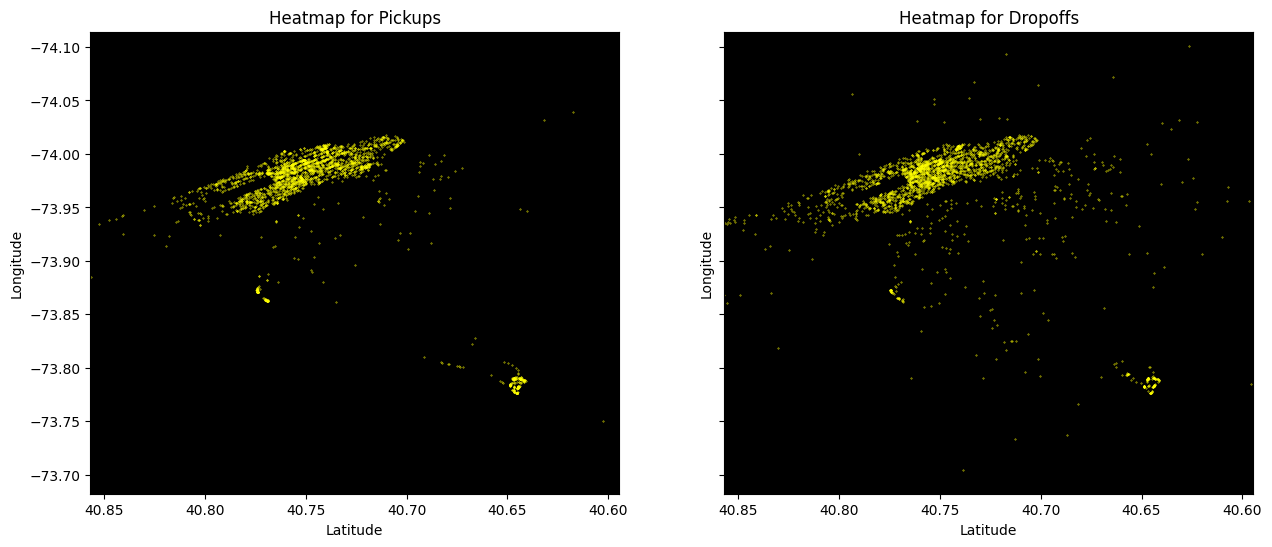

In [74]:
# heatmap of the pickups and dropoffs where trip duration was greater than 100 min

fig,ax = plt.subplots(nrows=1,ncols=2,sharey=True,
                     figsize=(15,6))

ax[0].set_facecolor('k')
ax[0].scatter(extreme_time_durations_df['pickup_latitude'],extreme_time_durations_df['pickup_longitude'],s=0.1,color='yellow')
ax[0].set_ylim(longitude_coord)
ax[0].set_xlim(latitude_coord)
ax[0].set_title('Heatmap for Pickups')
ax[0].set_xlabel('Latitude')
ax[0].set_ylabel('Longitude')

ax[1].set_facecolor('k')
ax[1].scatter(extreme_time_durations_df['dropoff_latitude'],extreme_time_durations_df['dropoff_longitude'],s=0.1,color='yellow')
ax[1].set_ylim(longitude_coord)
ax[1].set_xlim(latitude_coord)
ax[1].set_title('Heatmap for Dropoffs')
ax[1].set_xlabel('Latitude')
ax[1].set_ylabel('Longitude')

plt.show()

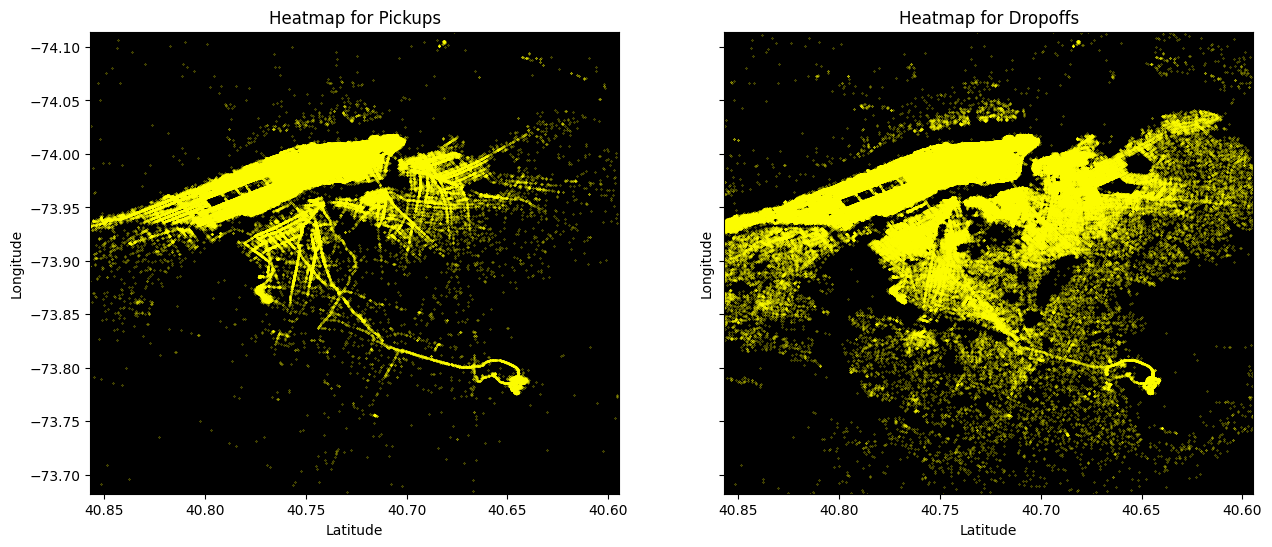

In [75]:
# heatmap of the pickups and dropoffs where trip duration was less than 100 min

fig,ax = plt.subplots(nrows=1,ncols=2,sharey=True,
                     figsize=(15,6))

ax[0].set_facecolor('k')
ax[0].scatter(normal_durations_df['pickup_latitude'],normal_durations_df['pickup_longitude'],s=0.05,color='yellow')
ax[0].set_ylim(longitude_coord)
ax[0].set_xlim(latitude_coord)
ax[0].set_title('Heatmap for Pickups')
ax[0].set_xlabel('Latitude')
ax[0].set_ylabel('Longitude')

ax[1].set_facecolor('k')
ax[1].scatter(normal_durations_df['dropoff_latitude'],normal_durations_df['dropoff_longitude'],s=0.05,color='yellow')
ax[1].set_ylim(longitude_coord)
ax[1].set_xlim(latitude_coord)
ax[1].set_title('Heatmap for Dropoffs')
ax[1].set_xlabel('Latitude')
ax[1].set_ylabel('Longitude')

plt.show()

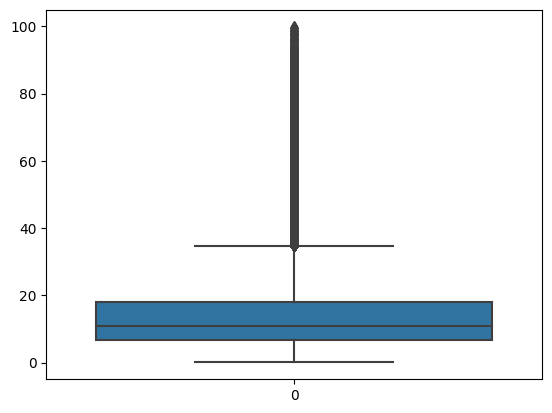

In [76]:
# distribution of target col when max time duration is less than or equals 100 min

sns.boxplot(target_col_minutes[target_col_minutes <= 100])
plt.show()

In [77]:
# passenger count in datasets

print(normal_durations_df['passenger_count'].unique())
print(extreme_time_durations_df['passenger_count'].unique())

[1 6 4 2 3 5 0 7 9 8]
[1 3 6 2 5 4 0]


In [78]:
normal_durations_df.loc[:,'trip_duration'] = normal_durations_df['trip_duration'] / 60
extreme_time_durations_df.loc[:,'trip_duration'] = extreme_time_durations_df['trip_duration'] / 60

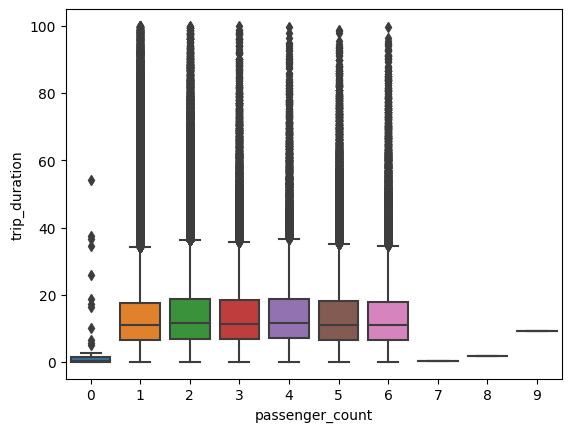

In [79]:
# box plots based on passenger count (To check whether passsenger count makes a diff)

sns.boxplot(data=normal_durations_df,x='passenger_count',y='trip_duration')
plt.show()

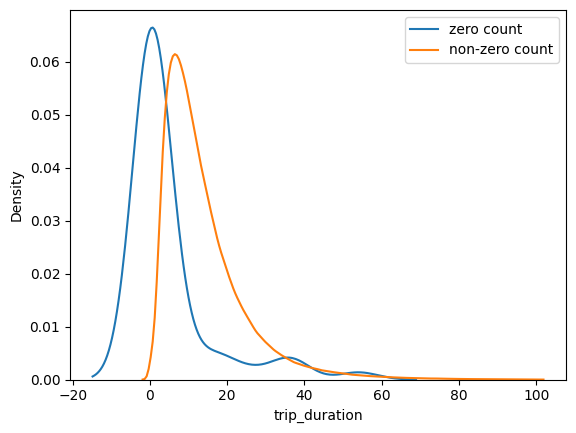

In [80]:
sns.kdeplot(data=normal_durations_df.loc[normal_durations_df['passenger_count'] == 0,:],x='trip_duration',label='zero count')
sns.kdeplot(data=normal_durations_df.loc[~(normal_durations_df['passenger_count'] == 0),:],x='trip_duration',label='non-zero count')
plt.legend()
plt.show()

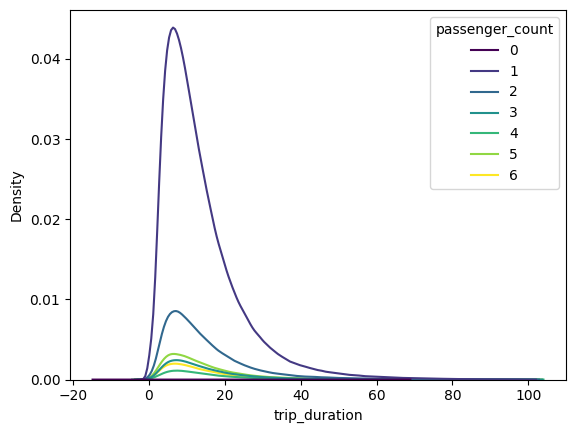

In [81]:
passenger_count_range = list(range(0,7))

sns.kdeplot(data=normal_durations_df.loc[normal_durations_df['passenger_count'].isin(passenger_count_range),:],
            x='trip_duration',hue='passenger_count',palette='viridis')
plt.show()

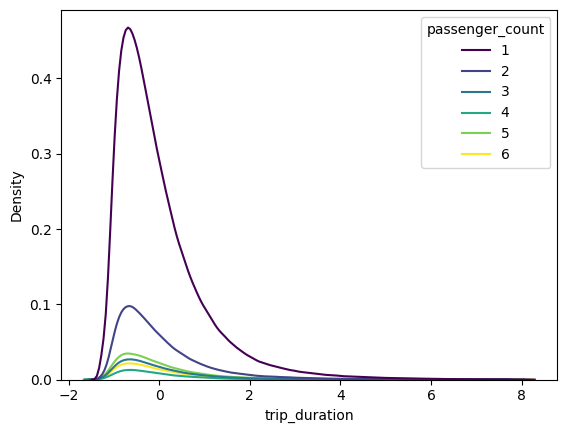

In [82]:
# kde plot for distribution based on passenger count (standardized)

passenger_count_grp = normal_durations_df.groupby('passenger_count')

#standardize each distribution

temp_df = pd.DataFrame()
temp_df['passenger_count'] = normal_durations_df['passenger_count'].copy()

temp_df['trip_duration'] = passenger_count_grp['trip_duration'].transform(lambda x: (x - x.mean()) / x.std())

passenger_count_range = list(range(1,7))

sns.kdeplot(data=temp_df.loc[temp_df['passenger_count'].isin(passenger_count_range),:],
            x='trip_duration',hue='passenger_count',palette='viridis')
plt.show()

In [83]:
# remove extreme values
extreme_time_durations_df = extreme_time_durations_df.loc[extreme_time_durations_df['trip_duration'] < 10000,:]

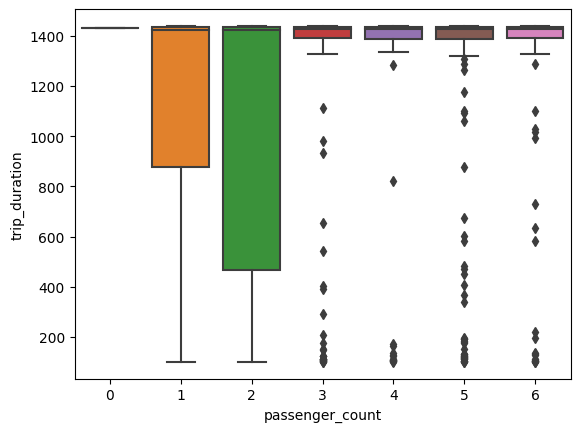

In [84]:
# box plots based on passenger count (To check whether passsenger count makes a diff)

sns.boxplot(data=extreme_time_durations_df,x='passenger_count',y='trip_duration')
plt.show()

In [85]:
# skewness of the output column
normal_durations_df['trip_duration'].skew()

2.1161167221274226

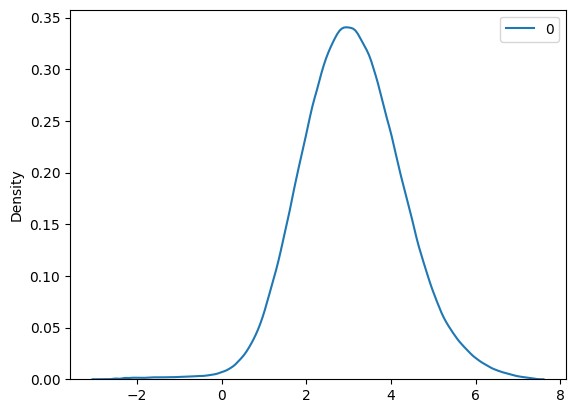

In [86]:
# apply box cox transformation

from sklearn.preprocessing import PowerTransformer

pt_target = PowerTransformer(method='box-cox',standardize=False)

# transform the output column

trip_duration_trans = pt_target.fit_transform(normal_durations_df[['trip_duration']])

sns.kdeplot(trip_duration_trans)
plt.show()

## id

In [87]:
train_df['id'].head()

0    id2875421
1    id2377394
2    id3858529
3    id3504673
4    id2181028
Name: id, dtype: object

In [88]:
# remove the id tag from all the rows

def remove_id_tag(data):
    data['id'] = data['id'].str.replace('id','')
    return data['id']

# remove tag from train data
remove_id_tag(train_df)

0          2875421
1          2377394
2          3858529
3          3504673
4          2181028
            ...   
1458639    2376096
1458640    1049543
1458641    2304944
1458642    2714485
1458643    1209952
Name: id, Length: 1458644, dtype: object

In [89]:
# remove tag from test data
remove_id_tag(test_df)

0         3004672
1         3505355
2         1217141
3         2150126
4         1598245
           ...   
625129    3008929
625130    3700764
625131    2568735
625132    1384355
625133    0621643
Name: id, Length: 625134, dtype: object

In [90]:
# convert the id column to integer
train_df['id'] = train_df['id'].astype('int')
test_df['id'] = test_df['id'].astype('int')

In [91]:
# test if id column is required

def test_id_column(data):
    if data.shape[0] == data['id'].nunique():
        new_data = data.drop(columns='id')
        return new_data
    else:
        return data
    
train_df_new = test_id_column(train_df)
test_df_new = test_id_column(test_df)

In [92]:
train_df_new

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...
1458639,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


## vendor_id

In [93]:
# categories in the vendor id column

train_df_new['vendor_id'].value_counts().sort_index()

vendor_id
1    678342
2    780302
Name: count, dtype: int64

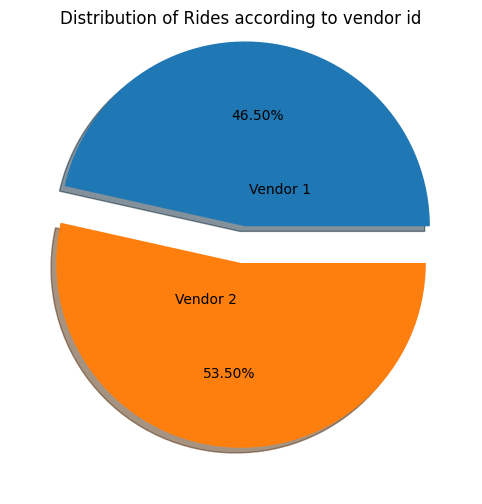

In [94]:
# pie chart showing distribution
fig = plt.figure(figsize=(12,6))
plt.pie(train_df_new['vendor_id'].value_counts().sort_index(),autopct='%.2f%%',
        explode=[0.2,0],shadow=True,labels=['Vendor 1','Vendor 2'],labeldistance=0.2)
plt.title('Distribution of Rides according to vendor id')
plt.show()

- People are more likely to select vendor 2 for its services as compared to vendor 1.

## pickup datetime

In [95]:
# change the column to datetime
train_df_new['pickup_datetime'] = pd.to_datetime(train_df_new['pickup_datetime'])
test_df_new['pickup_datetime'] = pd.to_datetime(test_df_new['pickup_datetime'])

In [96]:
train_df_new.shape

(1458644, 10)

In [97]:
train_df_new['pickup_datetime'].dt.weekday

0          0
1          6
2          1
3          2
4          5
          ..
1458639    4
1458640    6
1458641    4
1458642    1
1458643    1
Name: pickup_datetime, Length: 1458644, dtype: int32

In [98]:
# feature extraction

def make_datetime_features(data,column_type):
    data[f'{column_type}_hour'] = data[f'{column_type}_datetime'].dt.hour 
    data[f'{column_type}_date'] = data[f'{column_type}_datetime'].dt.day
    data[f'{column_type}_month'] = data[f'{column_type}_datetime'].dt.month
    data[f'{column_type}_day'] = data[f'{column_type}_datetime'].dt.weekday
    data[f'is_weekend'] = data.apply(lambda row: row[f'{column_type}_day'] >= 5,axis=1).astype('int')
    return data

In [99]:
# datetime features for pickup column in train data 
make_datetime_features(train_df_new,'pickup')
# datetime features for pickup column in test data
make_datetime_features(test_df_new,'pickup')

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_hour,pickup_date,pickup_month,pickup_day,is_weekend
0,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N,23,30,6,3,0
1,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N,23,30,6,3,0
2,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N,23,30,6,3,0
3,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N,23,30,6,3,0
4,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N,23,30,6,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
625129,1,2016-01-01 00:02:52,1,-74.003464,40.725105,-74.001251,40.733643,N,0,1,1,4,0
625130,1,2016-01-01 00:01:52,1,-74.006363,40.743782,-73.953407,40.782467,N,0,1,1,4,0
625131,1,2016-01-01 00:01:24,2,-73.972267,40.759865,-73.876602,40.748665,N,0,1,1,4,0
625132,1,2016-01-01 00:00:28,1,-73.976501,40.733562,-73.854263,40.891788,N,0,1,1,4,0


In [100]:
train_df_new.shape

(1458644, 15)

In [101]:
train_df_new.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_hour,pickup_date,pickup_month,pickup_day,is_weekend
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,17,14,3,0,0
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0,12,6,6,1
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,11,19,1,1,0
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,19,6,4,2,0
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,13,26,3,5,1


In [102]:
# save the data 
# make the directory as datetime
save_path = Path('/kaggle/working/') / 'datetime'
save_path.mkdir(parents=True,exist_ok=True)

# save the train file
train_df_new.to_csv(save_path / 'train.csv')

# save the test file
test_df_new.to_csv(save_path / 'test.csv')

## EDA on the Datetime Columns

In [103]:
# time range for the train data

train_df_new['pickup_datetime'].max() - train_df_new['pickup_datetime'].min() 

Timedelta('181 days 23:59:22')

**The time range shows that we have the data for 6 months**

In [104]:
# time range for the test data

test_df_new['pickup_datetime'].max() - test_df_new['pickup_datetime'].min() 

Timedelta('181 days 23:59:36')

The time range for the train and test data appears to be similar

In [105]:
# time range for the train and test data

data_temp = {'Opening_date':[train_df_new['pickup_datetime'].min(),test_df_new['pickup_datetime'].min()],
            'Closing_date':[train_df_new['pickup_datetime'].max(),test_df_new['pickup_datetime'].max()]}

pd.DataFrame(data=data_temp,index=['train','test']).T

,train,test
Opening_date,2016-01-01 00:00:17,2016-01-01 00:00:22
Closing_date,2016-06-30 23:59:39,2016-06-30 23:59:58


This shows that both the train and the test data have ranges from the same dates i.e. from **(Jan 1st, 2016)** till **(June 30th, 2016)**.

In [106]:
# total pickups each day

train_df_new['pickup_datetime'].dt.date \
.value_counts() \
.sort_index()

pickup_datetime
2016-01-01    7162
2016-01-02    6512
2016-01-03    6353
2016-01-04    6725
2016-01-05    7204
              ... 
2016-06-26    7084
2016-06-27    7311
2016-06-28    7253
2016-06-29    7623
2016-06-30    7588
Name: count, Length: 182, dtype: int64

**Idea behind this code**:


I needed to find out the pickup pattern of passengers on a particular date in line plots for both the train and test data.   
To do this:  
1. Calculated the value counts(count of rows) for each date, which will give me the total no. of pickups in the data for that particular date.
2. Then I sorted the index to reorder the data in correct chronological order.

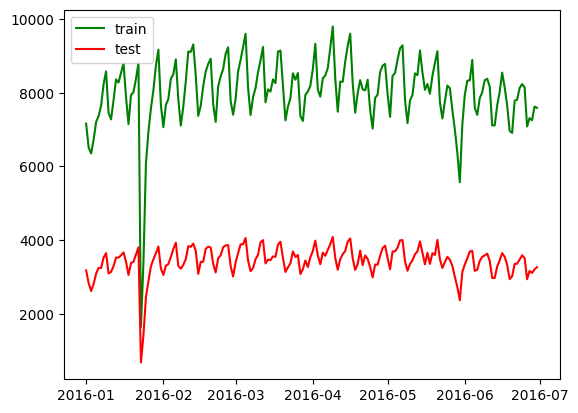

In [107]:
# pickup patterns for train and test data

plt.plot(train_df_new['pickup_datetime'].dt.date.value_counts().sort_index(),color='green',label='train')
plt.plot(test_df_new['pickup_datetime'].dt.date.value_counts().sort_index(),color='red',label='test')
plt.legend()
plt.show()

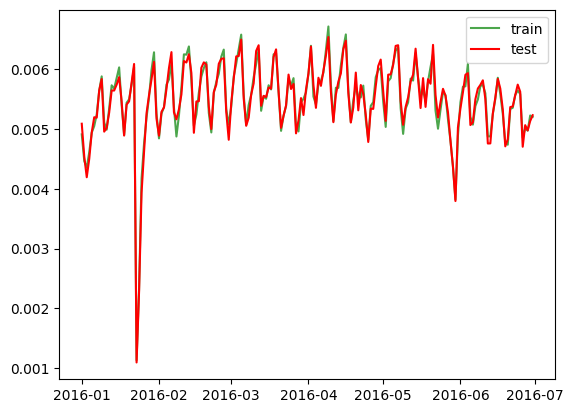

In [108]:
# pickup patterns for train and test data (results normalized) --> equalize the scales

plt.plot(train_df_new['pickup_datetime'].dt.date.value_counts(normalize=True).sort_index(),color='green',alpha=0.7,label='train')
plt.plot(test_df_new['pickup_datetime'].dt.date.value_counts(normalize=True).sort_index(),color='red',label='test')
plt.legend()
plt.show()

This graph clearly indicates that the pickup patterns for the train and test data are almost similar.

**Major Anomaly in the Pickup pattern**

The January 2016 United States blizzard produced up to 3 ft (91 cm) of snow in parts of the Mid-Atlantic and Northeastern United States during January 22–24, 2016

> A travel ban was instituted for New York City and Newark, New Jersey, for January 23–24.
> The blizzard that walloped New York City in January is officially the **biggest snowstorm in the history** of the five boroughs, according to a new report prompted by questions about the accuracy of snowfall measurements.

In [109]:
train_df_new.dtypes

vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime              object
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
pickup_hour                    int32
pickup_date                    int32
pickup_month                   int32
pickup_day                     int32
is_weekend                     int64
dtype: object

In [110]:
# Avg daily pickups

train_df_new['pickup_datetime'].dt.date \
.value_counts() \
.mean()

8014.527472527472

In [111]:
# avg pickups daily across all months

month_group = train_df_new.groupby(by='pickup_month')

daily_pickups_mean = month_group['pickup_date'] \
.value_counts() \
.mean()

daily_pickups_mean

8014.527472527472

**Idea behind this code**:
1. Group the pickups monthwise.
2. Calculate the pickups for each day in a particular month.
3. Then finally calculate the mean across all the months to get a daily avg.

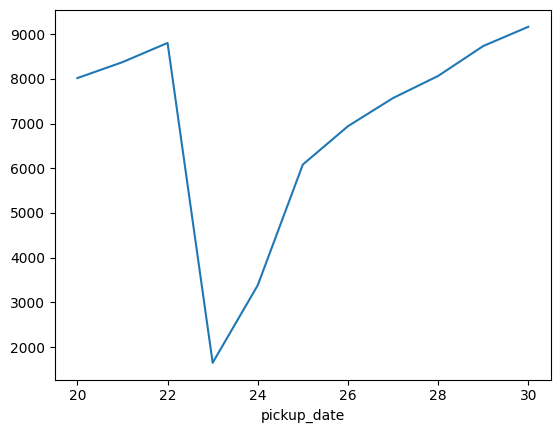

In [112]:
# taxi trips instead of travel bans
ban_df = train_df_new.loc[(train_df_new['pickup_date'].isin(list(range(20,31))) & (train_df_new['pickup_month'] == 1))]

ban_df['pickup_date'] \
.value_counts() \
.sort_index() \
.plot()
plt.show()

In [113]:
# no.of days when pickups were below the daily avg

unique_dates = train_df_new['pickup_datetime'].dt.date.value_counts()

below_daily_avg_count = unique_dates[unique_dates < daily_pickups_mean].size

percentage_below_avg = below_daily_avg_count / unique_dates.index.size

print(f'The number of days where number of pickups is below the daily avg is {below_daily_avg_count} which is {(percentage_below_avg * 100):.2f}% of the total days')


The number of days where number of pickups is below the daily avg is 82 which is 45.05% of the total days


In [114]:
from IPython.display import HTML

def horizontal(dfs):
    # display: flex in CSS means that
    # stuff added to this div is added sideways
    html = '<div style="display:flex">'

    for df in dfs:
        # adding our dataframe HTMLs as child elements
        # margin: 32px forces a 32 pixel spacing between dataframes
        html += '<div style="margin-right: 32px">'
        html += df.to_html()
        html += '</div>'
    html += '</div>'

    # converting our html string to actual HTML so that we can display() it
    display(HTML(html))

In [115]:
# dates where the pickups were below average for each month as compared to the daily average

temp_df = unique_dates[unique_dates < daily_pickups_mean].reset_index().sort_values('pickup_datetime')

temp_df['pickup_datetime'] = pd.to_datetime(temp_df['pickup_datetime'])
temp_df['month'] = temp_df['pickup_datetime'].dt.month

dfs_to_display = []

for month in np.sort(train_df_new['pickup_month'].unique()):
    filter_month = temp_df['month'] == month
    dfs_to_display.append(temp_df.loc[filter_month,['pickup_datetime','count']].reset_index(drop=True))
    
horizontal(dfs_to_display)

,pickup_datetime,count
0,2016-01-01,7162
1,2016-01-02,6512
2,2016-01-03,6353
3,2016-01-04,6725
4,2016-01-05,7204
5,2016-01-06,7365
6,2016-01-07,7649
7,2016-01-10,7454
8,2016-01-11,7276
9,2016-01-12,7794


In [116]:
ban_df['pickup_date'] \
.value_counts() \
.sort_values() 

pickup_date
23    1648
24    3383
25    6084
26    6941
27    7571
20    8018
28    8066
21    8375
29    8735
22    8805
30    9166
Name: count, dtype: int64

In [117]:
train_df_new['pickup_month'].unique()

array([3, 6, 1, 4, 5, 2], dtype=int32)

In [118]:
# number of pickups on travel ban days ie. 23rd & 24th Jan,2016

ban_pickups = ban_df['pickup_date'] \
.value_counts() \
.sort_values()

print(f'Number of Pickups on banned days are {ban_pickups[[23,24]].sum()}')

Number of Pickups on banned days are 5031


**Instead of the travel ban there were passengers taking cabs may be due to some emergency trips to the local hospital or to the airport for some reason**

More investigation has to be done to see what is the actual reason behind these travels instaed of a travel ban

In [119]:
# borders of nyc 

latitude_coord = train_df_new['pickup_latitude'].quantile([0.01,0.99]).sort_values(ascending=False).values + np.array([0.05,-0.05])
                                                                                                                                                                                                                             
longitude_coord = train_df_new['pickup_longitude'].quantile([0.01,0.99]).sort_values(ascending=False).values + np.array([0.1,-0.1])

In [120]:
longitude_coord

array([-73.68222656, -74.11431709])

In [121]:
latitude_coord

array([40.85659866, 40.59482498])

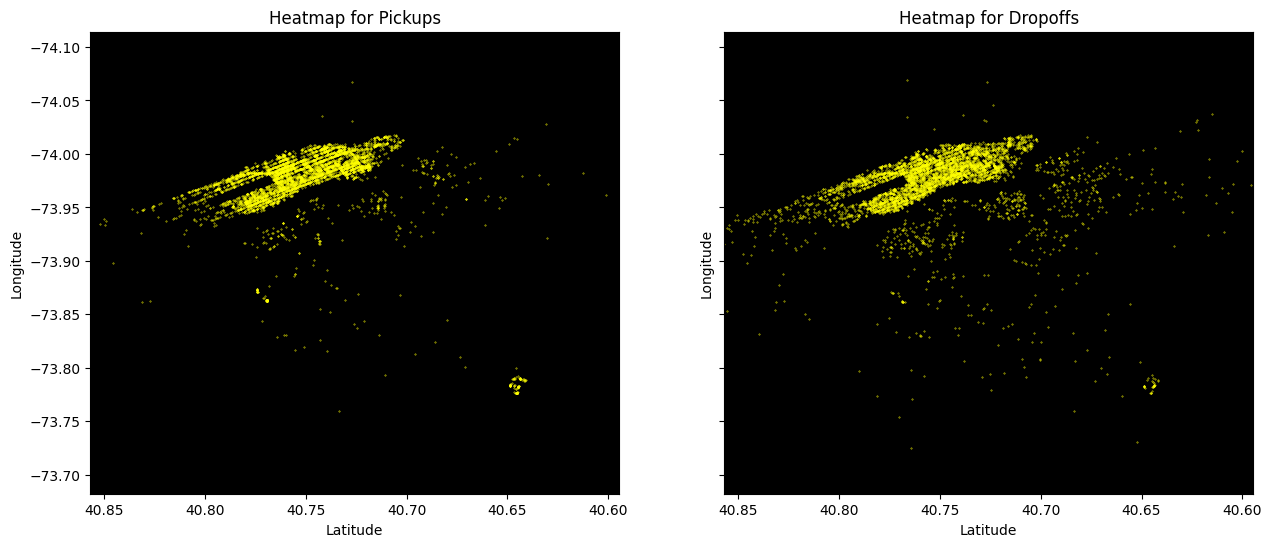

In [122]:
# heatmap of the pickups and dropoffs during the travel ban

ban_df = ban_df.loc[ban_df['pickup_date'].isin([23,24])]

fig,ax = plt.subplots(nrows=1,ncols=2,sharey=True,
                     figsize=(15,6))

ax[0].set_facecolor('k')
ax[0].scatter(ban_df['pickup_latitude'],ban_df['pickup_longitude'],s=0.1,color='yellow')
ax[0].set_ylim(longitude_coord)
ax[0].set_xlim(latitude_coord)
ax[0].set_title('Heatmap for Pickups')
ax[0].set_xlabel('Latitude')
ax[0].set_ylabel('Longitude')

ax[1].set_facecolor('k')
ax[1].scatter(ban_df['dropoff_latitude'],ban_df['dropoff_longitude'],s=0.1,color='yellow')
ax[1].set_ylim(longitude_coord)
ax[1].set_xlim(latitude_coord)
ax[1].set_title('Heatmap for Dropoffs')
ax[1].set_xlabel('Latitude')
ax[1].set_ylabel('Longitude')

plt.show()

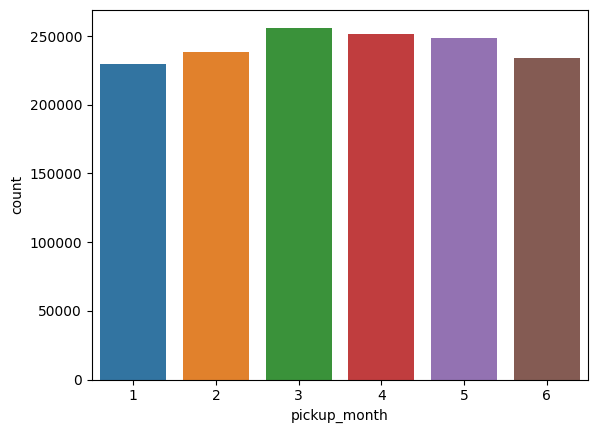

In [123]:
# count of total pickups each month

sns.countplot(data=train_df_new,x='pickup_month')
plt.show()

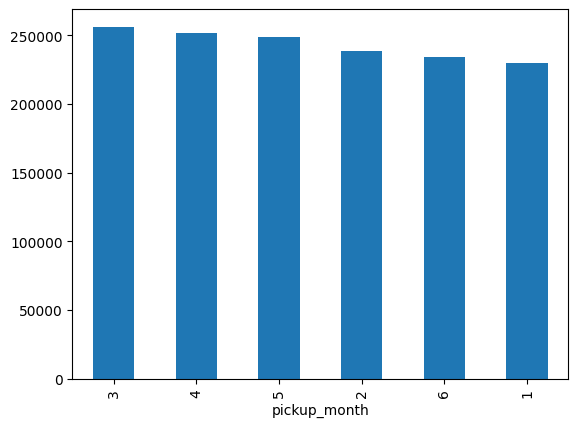

In [124]:
# pickups month wise in sorted order

train_df_new['pickup_month'] \
.value_counts() \
.sort_values(ascending=False)\
.plot(kind='bar')

plt.show()

- Less Number of pickups in the month of January can be related to weather events like snow, heavy blizzards or festive season.
- The other reason is that during festive season can drivers in New York expect heavier tips from the passengers, so passengers try to avoid taking cab services and only take when required.

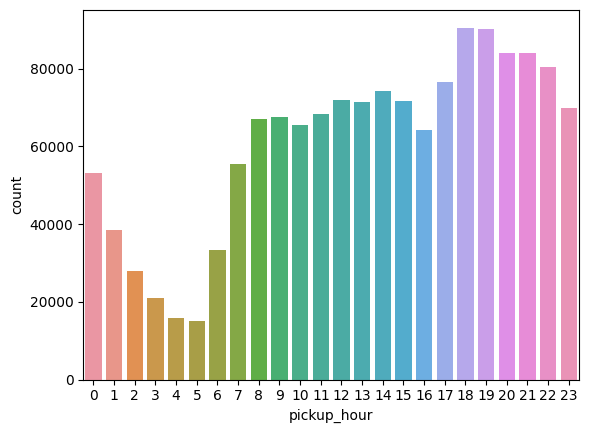

In [125]:
# rush hours for taxi pickups

sns.countplot(data=train_df_new,x='pickup_hour')
plt.show()

**Things to note**:
1. Cab pickups reduce after midnight and pickup pace after daybreak around 6am.
2. Pickups reach peak at 8am and then stabilize till 3pm.
3. Again the pickups gain strength around 6pm till 10pm at night

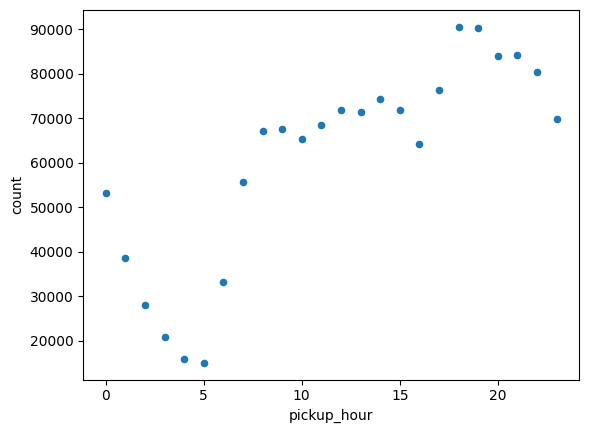

In [126]:
# rush hours divided into 3 clusters. (high rush, avg rush, low rush)

cluster_input = train_df_new['pickup_hour'] \
.value_counts() \
.sort_index() \
.reset_index()

cluster_input.plot(x='pickup_hour',y='count',kind='scatter')

plt.show()

In [127]:
cluster_input

,pickup_hour,count
0,0,53248
1,1,38571
2,2,27972
3,3,20895
4,4,15792
5,5,15002
6,6,33248
7,7,55600
8,8,67053
9,9,67663


#### Agglomerative Clustering

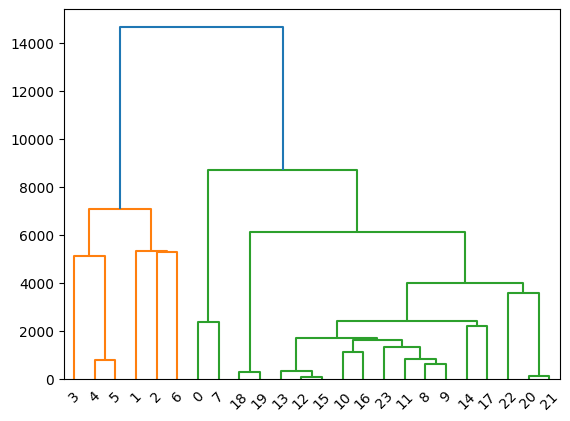

In [128]:
# plot the dendrogram

from scipy.cluster.hierarchy import dendrogram,linkage

clustering = linkage(y=cluster_input.values,method='single')

dendrogram(clustering)
plt.show()

**The dendrogram suggests to take the value of optimum clusters as 2**

In [129]:
from sklearn.cluster import AgglomerativeClustering, KMeans

agglo = AgglomerativeClustering(n_clusters=2,linkage='single',
                                metric='euclidean')

agglo

AgglomerativeClustering(linkage='single', metric='euclidean')

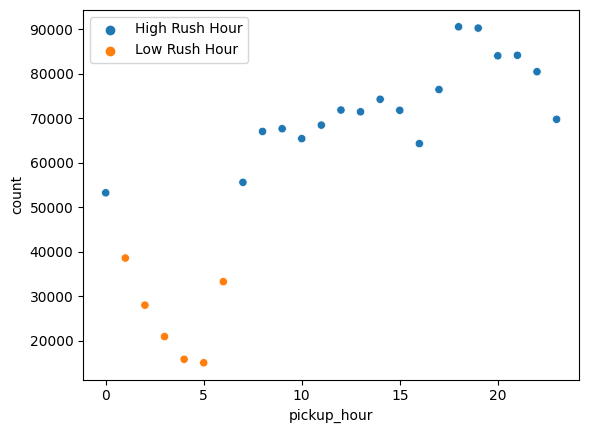

In [130]:
# plot the clusters
predictions = agglo.fit_predict(cluster_input)
sns.scatterplot(data=cluster_input,
                x='pickup_hour',y='count',
                hue=np.where(predictions == 0,'High Rush Hour','Low Rush Hour'))
plt.show()

#### KMeans Clustering

In [131]:
from sklearn.metrics import silhouette_score

The silhouette score for 2 clusters is 0.730999345100762
The silhouette score for 3 clusters is 0.6041879661284338
The silhouette score for 4 clusters is 0.6015263924638993
The silhouette score for 5 clusters is 0.643595821618139
The silhouette score for 6 clusters is 0.5882506032665346


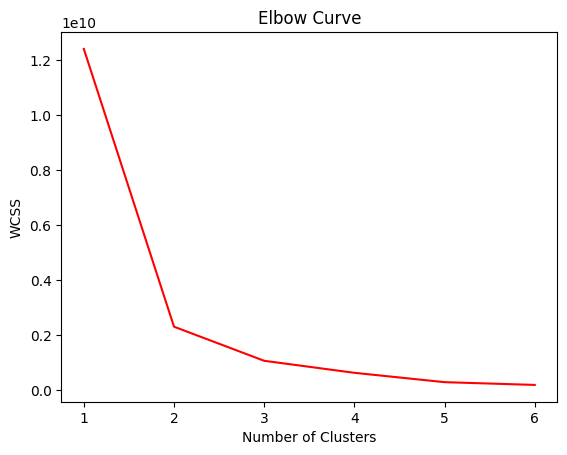

In [132]:
# elbow plot for the clusters along with silhouette score

n_clusters= [1,2,3,4,5,6]
inertia_kmeans = []

for n in n_clusters:
    kmeans = KMeans(n_clusters=n,n_init=10,max_iter=50)
    # fit on the data
    predictions = kmeans.fit_predict(cluster_input)
    # append the wcss in the list
    inertia_kmeans.append(kmeans.inertia_)
    # calculate the silhouette score
    if n < 2:
        continue
    else:
        score = silhouette_score(X=cluster_input,labels=predictions)
        print(f'The silhouette score for {n} clusters is {score}')
    
# plot the elcow curve
plt.plot(n_clusters,inertia_kmeans,color='red')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

plt.show()

In [133]:
from sklearn.cluster import KMeans

In [134]:
# train kmeans for 2 clusters

kmeans = KMeans(n_clusters=2,n_init=10,max_iter=50)

# get the predictions
predictions = kmeans.fit_predict(cluster_input)

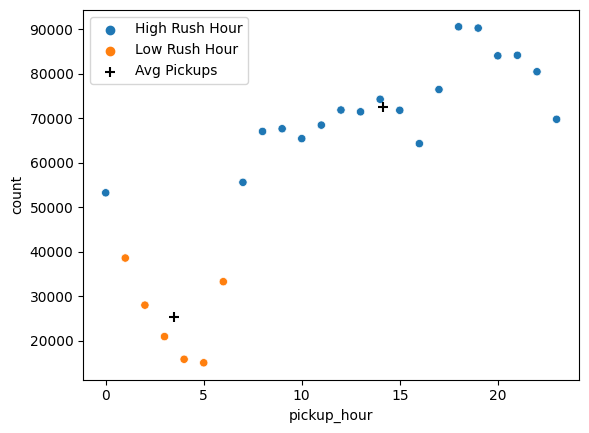

In [135]:
# get the centroids and plot on the curve
cluster_centroids = kmeans.cluster_centers_
# plot the scatter plot
sns.scatterplot(data=cluster_input,
                x='pickup_hour',y='count',
                hue=np.where(predictions == 0,'High Rush Hour','Low Rush Hour'))
#plt.scatter(cluster_input['pickup_hour'],cluster_input['count'],c=predictions)
# plot the cluster centroids
plt.scatter(cluster_centroids[:,0],cluster_centroids[:,1],marker='+',s=60,c='k',label='Avg Pickups')
plt.legend()
plt.show()

In [136]:
cluster_centroids = kmeans.cluster_centers_
cluster_centroids

array([[1.41666667e+01, 7.26202222e+04],
       [3.50000000e+00, 2.52466667e+04]])

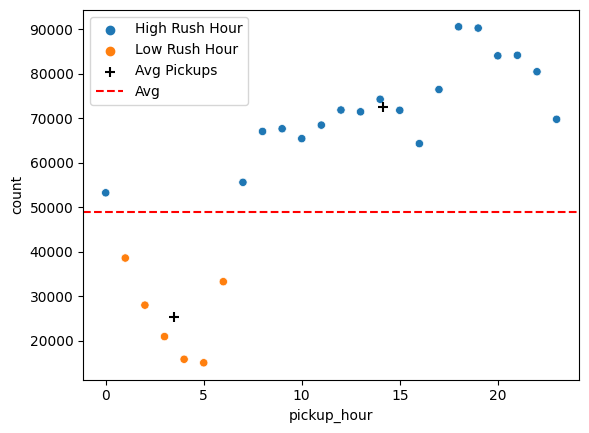

In [137]:
# get the centroids and plot on the curve
cluster_centroids = kmeans.cluster_centers_
# plot the scatter plot
sns.scatterplot(data=cluster_input,
                x='pickup_hour',y='count',
                hue=np.where(predictions == 0,'High Rush Hour','Low Rush Hour'))
#plt.scatter(cluster_input['pickup_hour'],cluster_input['count'],c=predictions)
# plot the cluster centroids
plt.scatter(cluster_centroids[:,0],cluster_centroids[:,1],marker='+',s=60,c='k',label='Avg Pickups')
plt.axhline(y=cluster_centroids[:,1].mean(),linestyle='--',color='red',label='Avg')
plt.legend()
plt.show()

**Experiment if pickup pattern deviate from the normal when the day is a weekend**

In [138]:
# avg pickups when the day is a weekend or not

weekend_grp = train_df_new.groupby('is_weekend')

weekend_grp['pickup_day'].value_counts() \
.unstack() \
.mean(axis=1)

is_weekend
0    208482.0
1    208117.0
dtype: float64

In [139]:
# we can also try double groupby applications

weekend_grp['pickup_day'].value_counts() \
.groupby('is_weekend') \
.mean()

is_weekend
0    208482.0
1    208117.0
Name: count, dtype: float64

**The avg pickups are almost similar on weekdays and weekends**

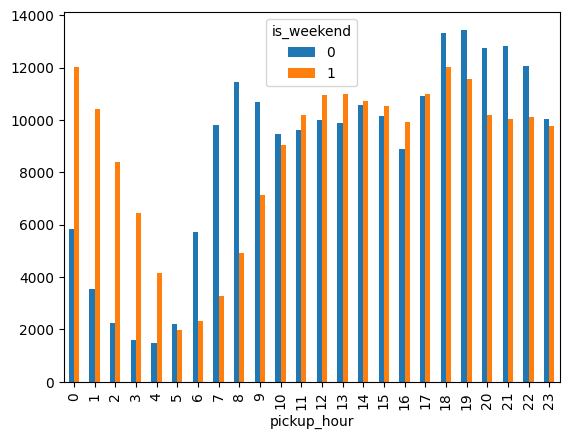

In [140]:
# pickup patterns on hour of the day for weekdays and weekends

def calculate_day_avg(group):
    value_counts = group['pickup_hour'].value_counts()
    number_of_days = group['pickup_day'].nunique()
    group_avg = value_counts / number_of_days
    return group_avg

weekend_grp.apply(calculate_day_avg).unstack(level=0).plot(kind='bar')

plt.show()

**Observations**:

1. People on the weekends travel more at the midnight and late night hours as compared to the weekdays.
2. Cab pickups picks up during morning hours on a weekday but the same is not true for weekends.
3. Late evening hours are busy on both the weekdays and weekends.

In [141]:
train_df_new.dtypes

vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime              object
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
pickup_hour                    int32
pickup_date                    int32
pickup_month                   int32
pickup_day                     int32
is_weekend                     int64
dtype: object

##### Pickup/Dropoff Patterns during Weekdays

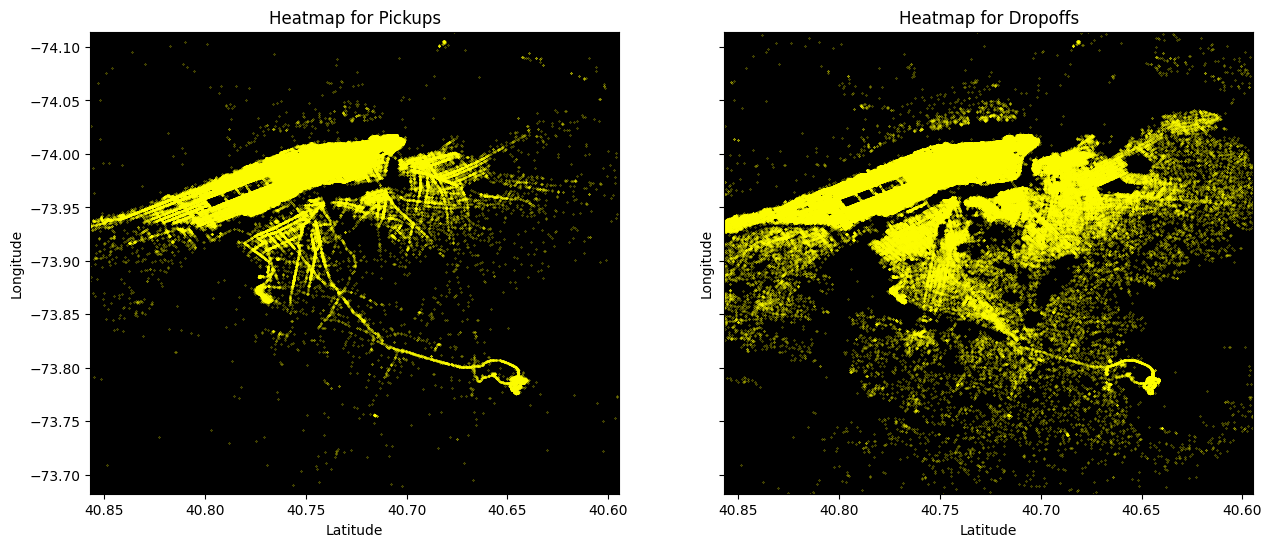

In [142]:
# heatmap of the pickups and dropoffs during the weekdays

temp_df = train_df_new.loc[train_df_new['is_weekend'] == 0,:]

fig,ax = plt.subplots(nrows=1,ncols=2,sharey=True,
                     figsize=(15,6))

ax[0].set_facecolor('k')
ax[0].scatter(temp_df['pickup_latitude'],temp_df['pickup_longitude'],s=0.05,color='yellow')
ax[0].set_ylim(longitude_coord)
ax[0].set_xlim(latitude_coord)
ax[0].set_title('Heatmap for Pickups')
ax[0].set_xlabel('Latitude')
ax[0].set_ylabel('Longitude')

ax[1].set_facecolor('k')
ax[1].scatter(temp_df['dropoff_latitude'],temp_df['dropoff_longitude'],s=0.05,color='yellow')
ax[1].set_ylim(longitude_coord)
ax[1].set_xlim(latitude_coord)
ax[1].set_title('Heatmap for Dropoffs')
ax[1].set_xlabel('Latitude')
ax[1].set_ylabel('Longitude')

plt.show()

##### Pickup/Dropoff Patterns during Weekend

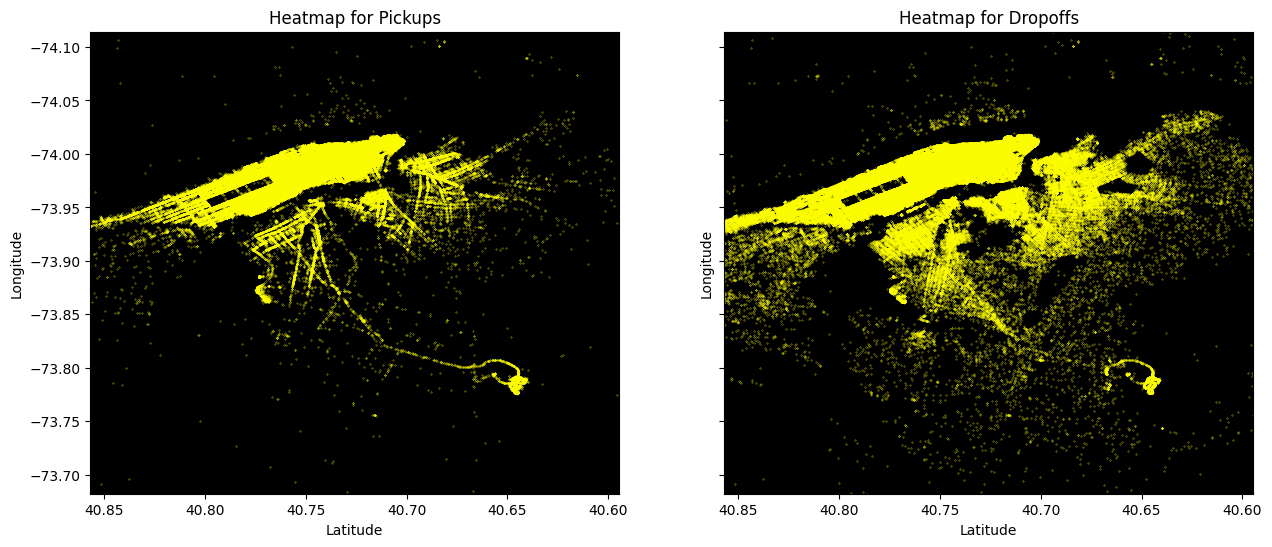

In [143]:
# heatmap of the pickups and dropoffs during the weekend

temp_df = train_df_new.loc[train_df_new['is_weekend'] == 1,:]

fig,ax = plt.subplots(nrows=1,ncols=2,sharey=True,
                     figsize=(15,6))

ax[0].set_facecolor('k')
ax[0].scatter(temp_df['pickup_latitude'],temp_df['pickup_longitude'],s=0.05,color='yellow')
ax[0].set_ylim(longitude_coord)
ax[0].set_xlim(latitude_coord)
ax[0].set_title('Heatmap for Pickups')
ax[0].set_xlabel('Latitude')
ax[0].set_ylabel('Longitude')

ax[1].set_facecolor('k')
ax[1].scatter(temp_df['dropoff_latitude'],temp_df['dropoff_longitude'],s=0.05,color='yellow')
ax[1].set_ylim(longitude_coord)
ax[1].set_xlim(latitude_coord)
ax[1].set_title('Heatmap for Dropoffs')
ax[1].set_xlabel('Latitude')
ax[1].set_ylabel('Longitude')

plt.show()

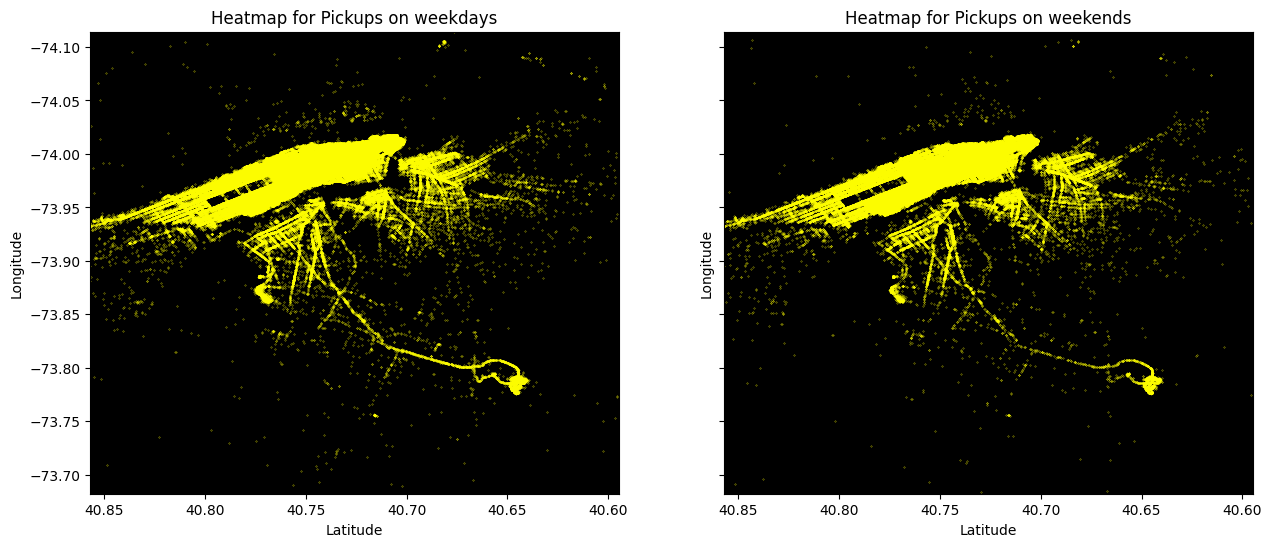

In [144]:
temp_df1 = train_df_new.loc[train_df_new['is_weekend'] == 0,:]
temp_df2 = train_df_new.loc[train_df_new['is_weekend'] == 1,:]

fig,ax = plt.subplots(nrows=1,ncols=2,sharey=True,
                     figsize=(15,6))

ax[0].set_facecolor('k')
ax[0].scatter(temp_df1['pickup_latitude'],temp_df1['pickup_longitude'],s=0.05,color='yellow')
ax[0].set_ylim(longitude_coord)
ax[0].set_xlim(latitude_coord)
ax[0].set_title('Heatmap for Pickups on weekdays')
ax[0].set_xlabel('Latitude')
ax[0].set_ylabel('Longitude')

ax[1].set_facecolor('k')
ax[1].scatter(temp_df2['pickup_latitude'],temp_df2['pickup_longitude'],s=0.05,color='yellow')
ax[1].set_ylim(longitude_coord)
ax[1].set_xlim(latitude_coord)
ax[1].set_title('Heatmap for Pickups on weekends')
ax[1].set_xlabel('Latitude')
ax[1].set_ylabel('Longitude')

plt.show()

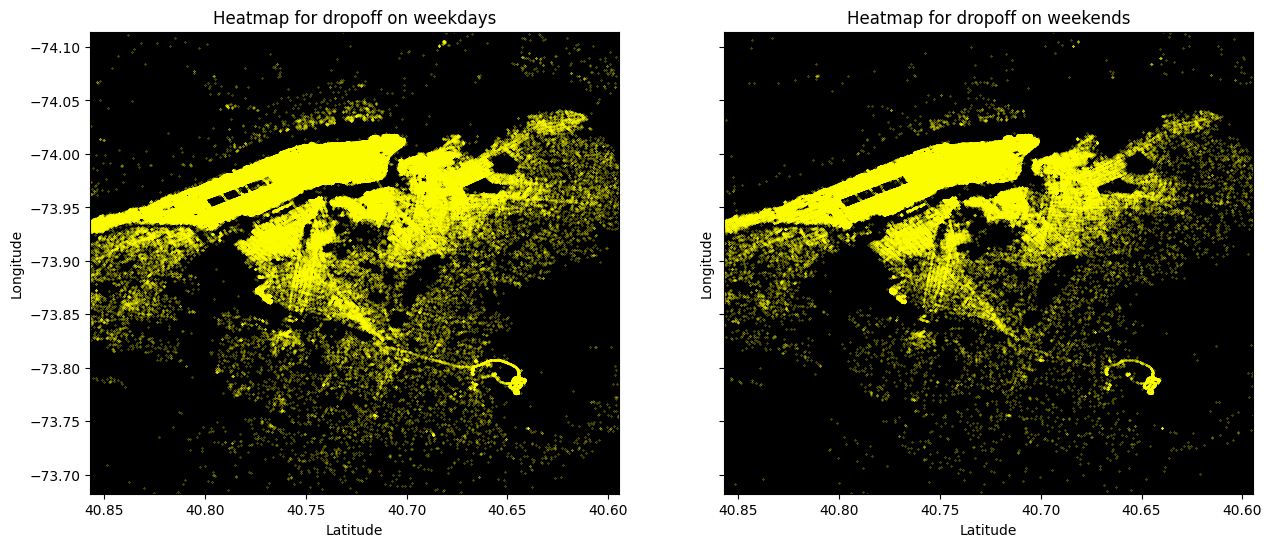

In [145]:
dropofftemp_df1 = train_df_new.loc[train_df_new['is_weekend'] == 0,:]
temp_df2 = train_df_new.loc[train_df_new['is_weekend'] == 1,:]

fig,ax = plt.subplots(nrows=1,ncols=2,sharey=True,
                     figsize=(15,6))

ax[0].set_facecolor('k')
ax[0].scatter(temp_df1['dropoff_latitude'],temp_df1['dropoff_longitude'],s=0.05,color='yellow')
ax[0].set_ylim(longitude_coord)
ax[0].set_xlim(latitude_coord)
ax[0].set_title('Heatmap for dropoff on weekdays')
ax[0].set_xlabel('Latitude')
ax[0].set_ylabel('Longitude')

ax[1].set_facecolor('k')
ax[1].scatter(temp_df2['dropoff_latitude'],temp_df2['dropoff_longitude'],s=0.05,color='yellow')
ax[1].set_ylim(longitude_coord)
ax[1].set_xlim(latitude_coord)
ax[1].set_title('Heatmap for dropoff on weekends')
ax[1].set_xlabel('Latitude')
ax[1].set_ylabel('Longitude')

plt.show()

## Pickup & Dropoff Latitude

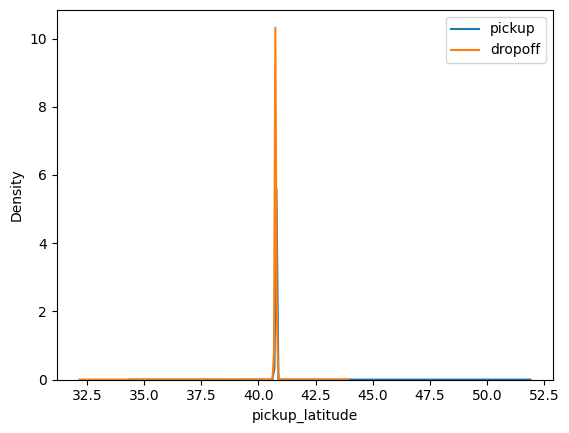

In [146]:
# distribution of the column

sns.kdeplot(train_df_new['pickup_latitude'],label='pickup')
sns.kdeplot(train_df_new['dropoff_latitude'],label='dropoff')
plt.legend()
plt.show()

- There are a considerable outliers on both sides of the distribution

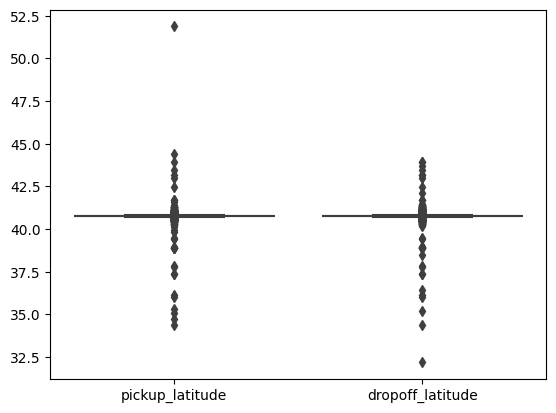

In [147]:
# plot boxplots

sns.boxplot(train_df_new[['pickup_latitude','dropoff_latitude']])
plt.show()

In [148]:
# get the min, max, median and mean values

train_df_new[['pickup_latitude','dropoff_latitude']].agg(['min','max','mean','median','std'])

,pickup_latitude,dropoff_latitude
min,34.359695,32.181141
max,51.881084,43.921028
mean,40.750921,40.751800
median,40.754101,40.754524
std,0.032881,0.035891


In [149]:
def compare_df_size(old_df,new_df):
    old_df_shape = old_df.shape
    new_df_shape = new_df.shape
    percentage_change = ((old_df_shape[0] - new_df_shape[0]) / old_df_shape[0]) * 100
    print(f'The shape of old dataframe is {old_df_shape}')
    print(f'The shape of new dataframe is {new_df_shape}')
    print(f'The difference of rows is {old_df_shape[0] - new_df_shape[0]}')
    print(f'The percentage of outliers removed are {percentage_change:.2f}')

In [150]:
# creating new dataframe without the outliers and then study the distribution
# outliers should be removed using the IQR approach

def remove_outliers(dataframe,column_names,fold=1.5):
    filtered_df = dataframe.copy()
    for column_name in column_names:
        Q1, Q3 = dataframe[column_name].quantile([0.25,0.75])
        IQR = Q3 - Q1
        upper_bound = Q3 + (fold*IQR)
        lower_bound = Q1 - (fold*IQR)
        filtered_df = filtered_df.loc[(dataframe[column_name] >= lower_bound) & (dataframe[column_name] <= upper_bound),:].copy()
    compare_df_size(old_df=dataframe,new_df=filtered_df)
    return filtered_df

In [151]:
# remove the outliers from the pickup_latitude/dropoff_latitude column

df_without_outliers = remove_outliers(dataframe=train_df_new,
                                    column_names=['pickup_latitude','dropoff_latitude',
                                                  'pickup_longitude','dropoff_longitude'],
                                    fold=3)

The shape of old dataframe is (1458644, 15)
The shape of new dataframe is (1341137, 15)
The difference of rows is 117507
The percentage of outliers removed are 8.06


**Even if the fold size is kept to 3, around 8 percent of the data rows are removed**   
This is a huge loss of training data and some other technique has to be applied.

In [152]:
# test the normality of columns
from scipy.stats import jarque_bera

def test_for_normality(data,column_name):
    alpha = 0.05
    _,p_val = jarque_bera(data[column_name].values)
    
    if p_val >= alpha:
        print(f'Fail to reject the H_0',f'The {column_name} is normally distributed')
    else:
        print(f'Reject the H_0',f'The {column_name} is  not normally distributed')

In [153]:
train_df_new.columns[4:8]

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude'],
      dtype='object')

In [154]:
column_to_test_for_normality = train_df_new.columns[4:8]

for col in column_to_test_for_normality:
    test_for_normality(data=train_df_new,
                      column_name=col)
    print('*' * 100,end='\n')

Reject the H_0 The pickup_longitude is  not normally distributed
****************************************************************************************************
Reject the H_0 The pickup_latitude is  not normally distributed
****************************************************************************************************
Reject the H_0 The dropoff_longitude is  not normally distributed
****************************************************************************************************
Reject the H_0 The dropoff_latitude is  not normally distributed
****************************************************************************************************


#### Testing the distribution after 8% of data is removed (only tests)

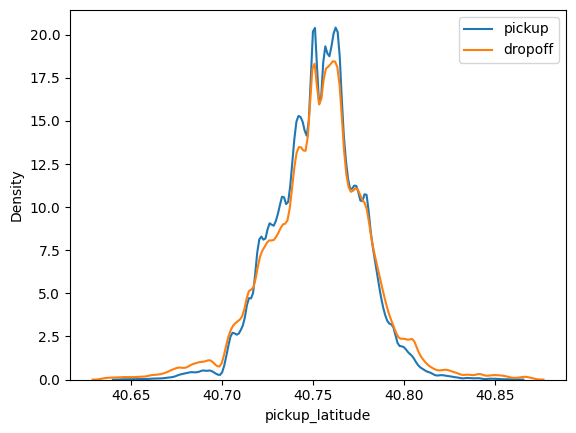

In [155]:
# distribution of the column

sns.kdeplot(df_without_outliers['pickup_latitude'],label='pickup')
sns.kdeplot(df_without_outliers['dropoff_latitude'],label='dropoff')
plt.legend()
plt.show()

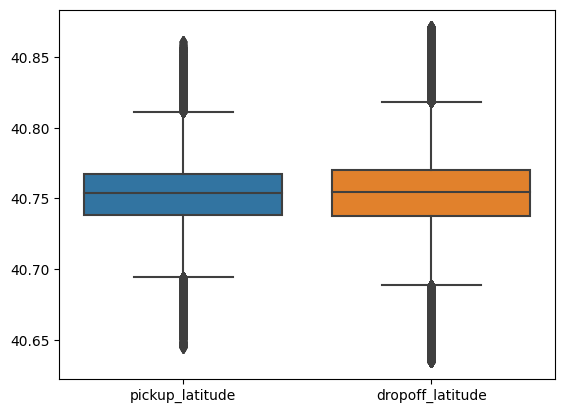

In [156]:
# plot boxplots

sns.boxplot(df_without_outliers[['pickup_latitude','dropoff_latitude']])
plt.show()

## Pickup & Dropoff Longitude

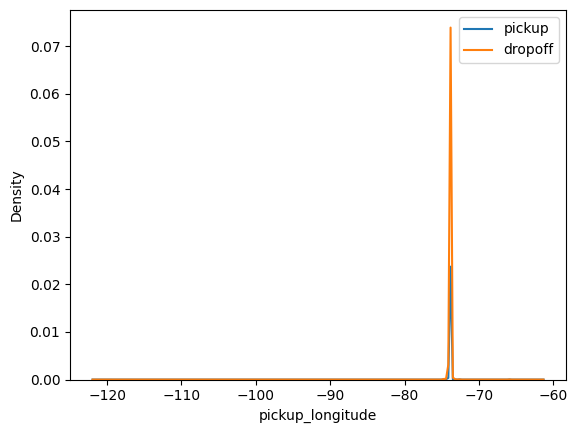

In [157]:
# distribution of the column

sns.kdeplot(train_df_new['pickup_longitude'],label='pickup')
sns.kdeplot(train_df_new['dropoff_longitude'],label='dropoff')
plt.legend()
plt.show()

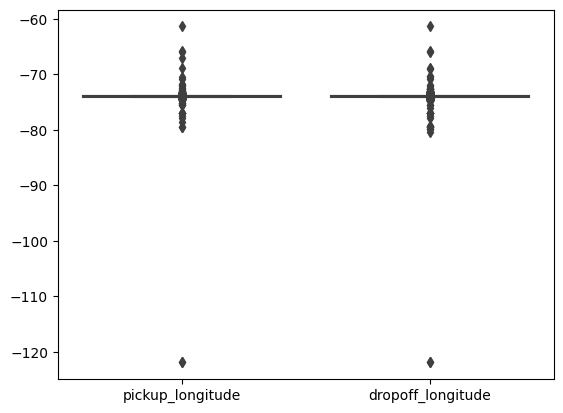

In [158]:
# plot boxplots

sns.boxplot(train_df_new[['pickup_longitude','dropoff_longitude']])
plt.show()

In [159]:
# get the min, max, median and mean values

train_df_new[['pickup_longitude','dropoff_longitude']].agg(['min','max','mean','median'])

,pickup_longitude,dropoff_longitude
min,-121.933342,-121.933304
max,-61.335529,-61.335529
mean,-73.973486,-73.973416
median,-73.981743,-73.979752


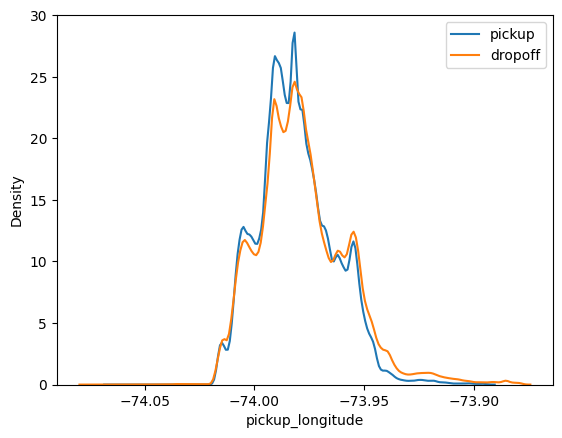

In [160]:
# distribution of the column

sns.kdeplot(df_without_outliers['pickup_longitude'],label='pickup')
sns.kdeplot(df_without_outliers['dropoff_longitude'],label='dropoff')
plt.legend()
plt.show()

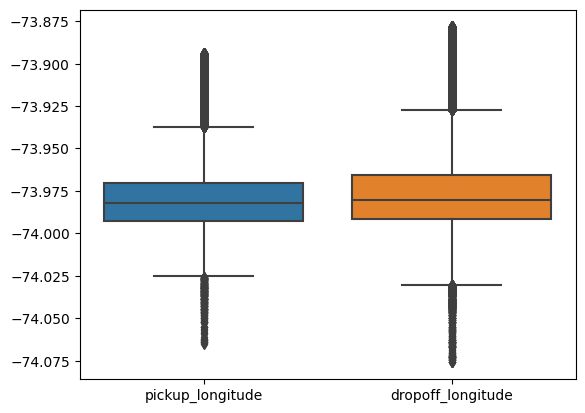

In [161]:
# plot boxplots

sns.boxplot(df_without_outliers[['pickup_longitude','dropoff_longitude']])
plt.show()

In [162]:
!pip install feature-engine

  Obtaining dependency information for feature-engine from https://files.pythonhosted.org/packages/62/60/77fcc9d3cfaabab34027aa8ea0025c5e2d4cf9561fa9725a38f0785b43aa/feature_engine-1.6.2-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 12.7 MB/s eta 0:00:00


#### Outlier removal using the percentile approach

In [163]:
train_df_new.columns[4:8]

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude'],
      dtype='object')

In [164]:
1 - 0.9982

0.0018000000000000238

In [165]:
100 * 60

6000

In [166]:
def plot_boxplots(data,columns):
    div, rem = divmod(len(columns),2)
    number_of_rows = div + rem
    number_of_columns = 2
    fig = plt.figure(figsize=(15,8))
    for ind,col in enumerate(columns):
        plt.subplot(number_of_rows,number_of_columns,ind+1)
        sns.boxplot(data=data,y=col,whis=3)
        plt.tight_layout()
    plt.show()

In [167]:
def plot_kdeplots(data,columns):
    div, rem = divmod(len(columns),2)
    number_of_rows = div + rem
    number_of_columns = 2
    fig = plt.figure(figsize=(15,8))
    for ind,col in enumerate(columns):
        plt.subplot(number_of_rows,number_of_columns,ind+1)
        sns.kdeplot(data=data,x=col)
        plt.tight_layout()
    plt.show()

In [168]:
normal_durations_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,7.583333
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,11.050000
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,35.400000
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,7.150000
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,7.250000


In [169]:
normal_durations_df['trip_duration'].max()

99.98333333333333

In [170]:
normal_durations_df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [171]:
df_subset = normal_durations_df.iloc[:,5:9]
df_subset

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,-73.982155,40.767937,-73.964630,40.765602
1,-73.980415,40.738564,-73.999481,40.731152
2,-73.979027,40.763939,-74.005333,40.710087
3,-74.010040,40.719971,-74.012268,40.706718
4,-73.973053,40.793209,-73.972923,40.782520
...,...,...,...,...
1458639,-73.982201,40.745522,-73.994911,40.740170
1458640,-74.000946,40.747379,-73.970184,40.796547
1458641,-73.959129,40.768799,-74.004433,40.707371
1458642,-73.982079,40.749062,-73.974632,40.757107


In [172]:
latitude_columns = normal_durations_df.columns[normal_durations_df.columns.str.contains('latitude')]
longitude_columns = normal_durations_df.columns[normal_durations_df.columns.str.contains('longitude')]

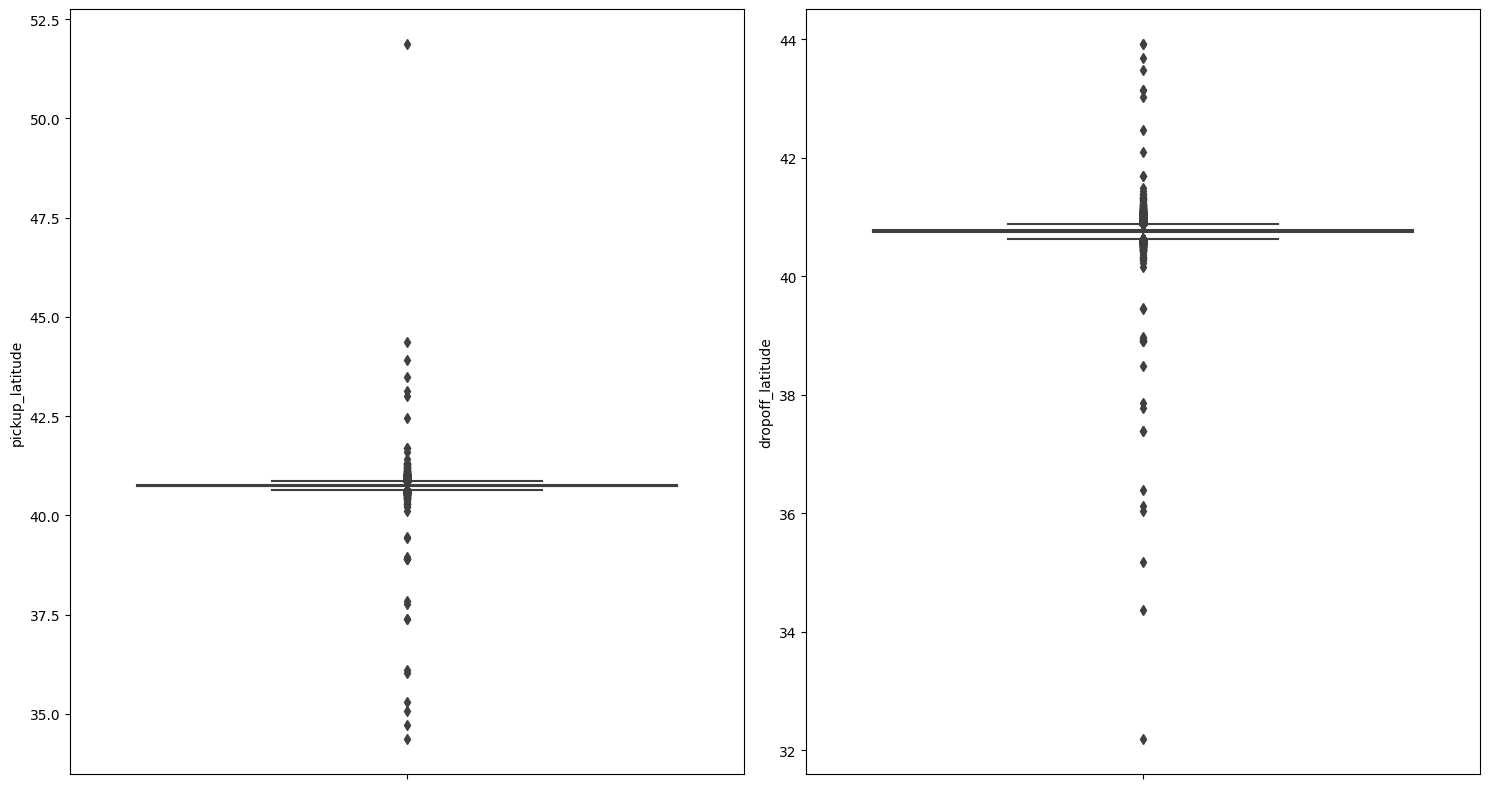

In [173]:
# boxplots for latitude columns

plot_boxplots(df_subset,latitude_columns)

In [174]:
normal_durations_df.loc[(df_subset['pickup_latitude'] > 50)]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
184925,id2306955,1,2016-05-07 18:58:53,2016-05-07 19:12:05,1,-72.809669,51.881084,-73.987228,40.750599,N,13.2


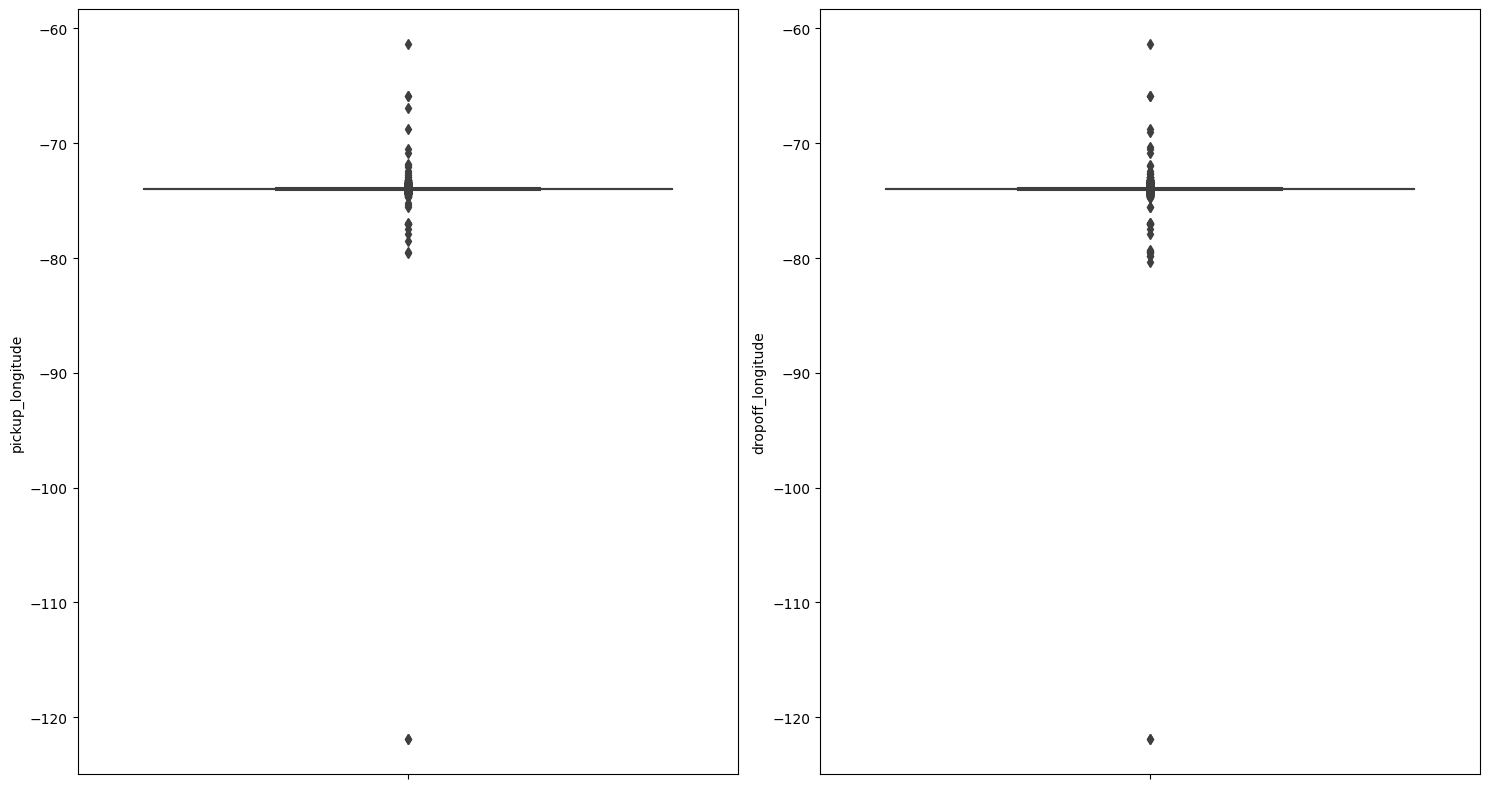

In [175]:
# boxplots for longitude columns

plot_boxplots(df_subset,longitude_columns)

In [176]:
remove_outliers(df_subset,df_subset.columns.to_list(),fold=1.5)

The shape of old dataframe is (1456077, 4)
The shape of new dataframe is (1265909, 4)
The difference of rows is 190168
The percentage of outliers removed are 13.06


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,-73.982155,40.767937,-73.964630,40.765602
1,-73.980415,40.738564,-73.999481,40.731152
2,-73.979027,40.763939,-74.005333,40.710087
3,-74.010040,40.719971,-74.012268,40.706718
4,-73.973053,40.793209,-73.972923,40.782520
...,...,...,...,...
1458639,-73.982201,40.745522,-73.994911,40.740170
1458640,-74.000946,40.747379,-73.970184,40.796547
1458641,-73.959129,40.768799,-74.004433,40.707371
1458642,-73.982079,40.749062,-73.974632,40.757107


In [177]:
# 0.1 and 99.9 percentile values

df_subset.quantile([0.001,0.999])

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0.001,-74.017220,40.641510,-74.177605,40.604317
0.999,-73.776688,40.842444,-73.740190,40.889462


In [178]:
# statistical summary of trip durations without removal of outliers

summary_original = normal_durations_df['trip_duration'].agg(func=['min','max','median','mean'])
summary_original.name = 'before_removal'

summary_original

min        0.016667
max       99.983333
median    11.016667
mean      13.914414
Name: before_removal, dtype: float64

In [179]:
# distribution of passenger count before outlier removal

normal_durations_df['passenger_count'].value_counts()

passenger_count
1    1031963
2     209917
5      77849
3      59759
6      48190
4      28335
0         59
7          3
9          1
8          1
Name: count, dtype: int64

In [180]:
# data row where passenger count is greater than 6

normal_durations_df[normal_durations_df['passenger_count'] > 6]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
433304,id3280610,2,2016-06-07 10:06:24,2016-06-07 10:06:43,7,-74.173668,40.737274,-74.173660,40.737297,N,0.316667
436047,id2489742,2,2016-06-24 08:09:21,2016-06-24 08:18:41,9,-73.710632,40.671581,-73.710632,40.671581,N,9.333333
489613,id0506488,2,2016-05-08 22:39:08,2016-05-08 22:39:23,7,-74.039482,40.715031,-74.039482,40.715019,N,0.250000
824904,id0988237,2,2016-04-23 19:46:08,2016-04-23 19:46:33,7,-73.631149,40.768551,-73.631149,40.768551,N,0.416667
826064,id1488553,2,2016-01-01 01:15:20,2016-01-01 01:17:04,8,-73.992653,40.768719,-74.041374,40.729954,N,1.733333


In [181]:
from feature_engine.outliers import OutlierTrimmer

trimmer = OutlierTrimmer(capping_method='quantiles',
                        tail='both',fold=0.001,
                        variables=df_subset.columns.to_list())

# remove the outliers

df_without_outliers = trimmer.fit_transform(normal_durations_df)

compare_df_size(normal_durations_df,df_without_outliers)

The shape of old dataframe is (1456077, 11)
The shape of new dataframe is (1445911, 11)
The difference of rows is 10166
The percentage of outliers removed are 0.70


In [182]:
trimmer.left_tail_caps_

{'pickup_longitude': -74.01721954345702,
 'pickup_latitude': 40.641510009765625,
 'dropoff_longitude': -74.17760467529298,
 'dropoff_latitude': 40.604316711425774}

In [183]:
trimmer.right_tail_caps_

{'pickup_longitude': -73.7766876220703,
 'pickup_latitude': 40.842444213867196,
 'dropoff_longitude': -73.74018975830077,
 'dropoff_latitude': 40.889461517333984}

In [184]:
df_without_outliers.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [185]:
# statistical summary of trip durations after removal of outliers

summary_after_removal = df_without_outliers['trip_duration'].agg(func=['min','max','median','mean'])
summary_after_removal.name = 'after_removal'
summary_after_removal

min        0.016667
max       99.983333
median    10.983333
mean      13.816252
Name: after_removal, dtype: float64

In [186]:
# merge the two results

pd.concat([summary_original,summary_after_removal],axis=1)

,before_removal,after_removal
min,0.016667,0.016667
max,99.983333,99.983333
median,11.016667,10.983333
mean,13.914414,13.816252


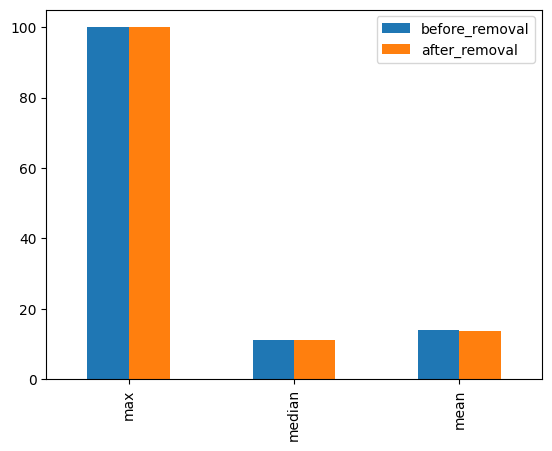

In [187]:
# plot the two results

pd.concat([summary_original,summary_after_removal],axis=1).iloc[1:,:].plot(kind='bar')
plt.show()

**The difference between the data before and after the removal of outliers is not that consequential**   

It is better to remove these data points and work with the data that have minimal impact of outliers in the latitude and longitude columns.

In [188]:
# distribution of passenger count after removal of outliers

df_without_outliers['passenger_count'].value_counts()

passenger_count
1    1024854
2     208322
5      77354
3      59329
6      47888
4      28111
0         52
8          1
Name: count, dtype: int64

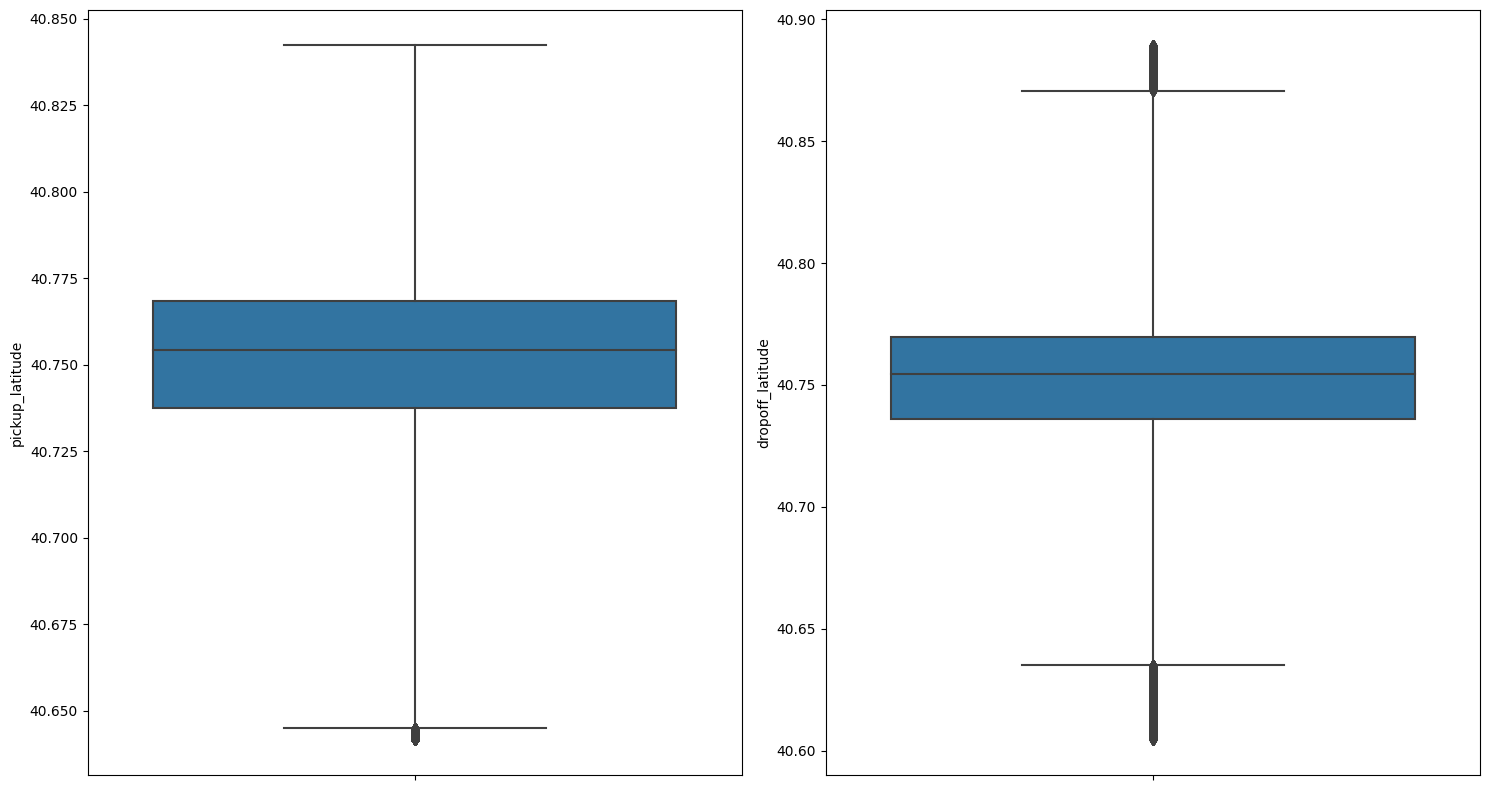

In [189]:
# boxplots for latitude columns

plot_boxplots(df_without_outliers,latitude_columns)

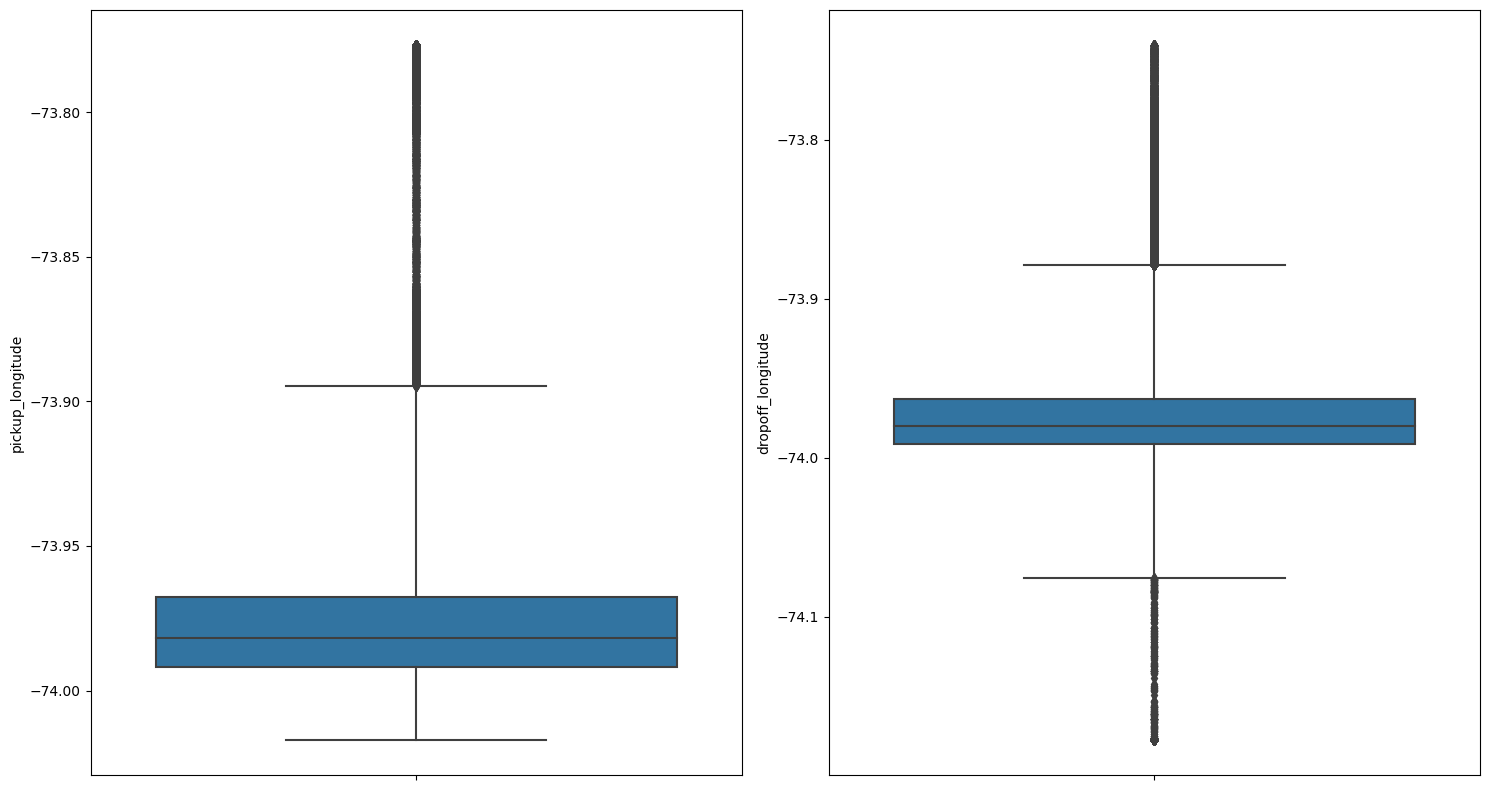

In [190]:
# boxplots for longitude columns

plot_boxplots(df_without_outliers,longitude_columns)

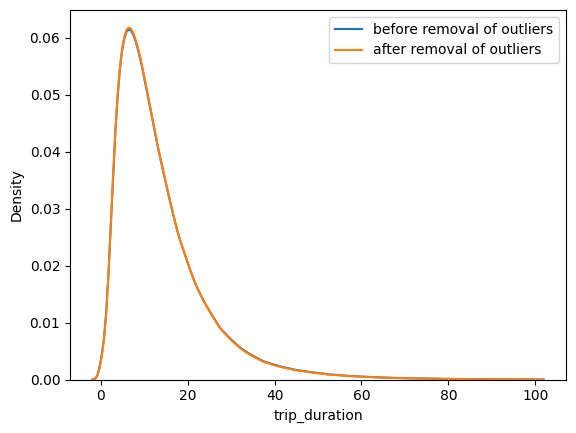

In [191]:
# distribution of the output column before and after removal of outliers

sns.kdeplot(data=normal_durations_df,x='trip_duration',label='before removal of outliers')

sns.kdeplot(data=df_without_outliers,x='trip_duration',label='after removal of outliers')
plt.legend()
plt.show()

In [192]:
from sklearn.preprocessing import PowerTransformer

In [193]:
latitude_columns.to_list() + longitude_columns.to_list()

['pickup_latitude',
 'dropoff_latitude',
 'pickup_longitude',
 'dropoff_longitude']

In [194]:
df_without_outliers[df_subset.columns].agg(['min','max','mean','median'])

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
min,-74.017220,40.64151,-74.177605,40.604317
max,-73.776688,40.84243,-73.740204,40.889462
mean,-73.973902,40.75115,-73.973587,40.751921
median,-73.981789,40.75420,-73.979797,40.754593


In [195]:
df_without_outliers.loc[(df_without_outliers['pickup_latitude'] == df_without_outliers['pickup_latitude'].min()),:]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
120228,id1906170,1,2016-01-09 22:32:08,2016-01-09 23:06:49,1,-73.788208,40.64151,-73.984116,40.720825,N,34.683333
188058,id3847366,1,2016-06-29 23:50:37,2016-06-30 00:23:20,1,-73.787994,40.64151,-73.987068,40.734283,N,32.716667
268188,id2939379,1,2016-06-18 20:56:17,2016-06-18 21:46:21,2,-73.787971,40.64151,-73.992371,40.756638,N,50.066667
357864,id2578987,1,2016-03-15 16:01:05,2016-03-15 16:46:21,1,-73.788368,40.64151,-73.957413,40.663593,N,45.266667
426572,id2520435,2,2016-04-05 17:49:51,2016-04-05 18:38:50,2,-73.788033,40.64151,-73.949181,40.784538,N,48.983333
483217,id1733131,1,2016-05-05 11:09:42,2016-05-05 11:59:42,2,-73.788010,40.64151,-73.979431,40.754852,Y,50.000000
485990,id2022839,1,2016-01-18 22:25:49,2016-01-18 22:58:11,2,-73.788132,40.64151,-73.993500,40.752308,N,32.366667
544976,id0803570,2,2016-01-12 23:18:04,2016-01-12 23:55:29,1,-73.788353,40.64151,-73.823143,40.863480,N,37.416667
770965,id1141844,1,2016-06-24 19:06:10,2016-06-24 19:52:04,1,-73.788666,40.64151,-73.936852,40.705795,N,45.900000
791962,id2792108,2,2016-03-13 18:30:17,2016-03-13 19:09:14,1,-73.788002,40.64151,-73.952057,40.717751,N,38.950000


In [196]:
!mkdir /kaggle/working/final_data

In [197]:
# save the data

df_without_outliers.to_csv('/kaggle/working/final_data/train.csv')

In [198]:
# load the data
final_df = df_without_outliers.copy()

In [199]:
final_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,7.583333
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,11.050000
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,35.400000
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,7.150000
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,7.250000


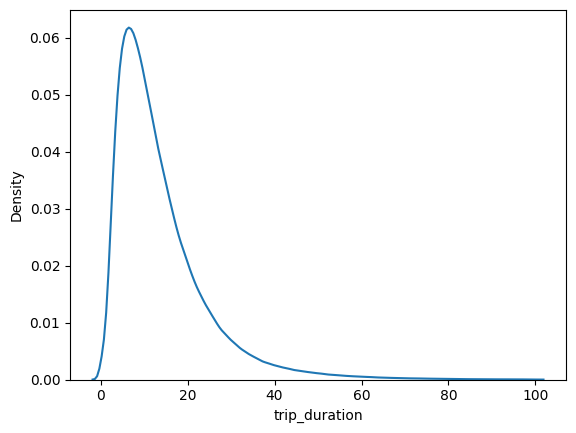

In [200]:
# kdeplot for the target column

sns.kdeplot(data=final_df,x='trip_duration')
plt.show()

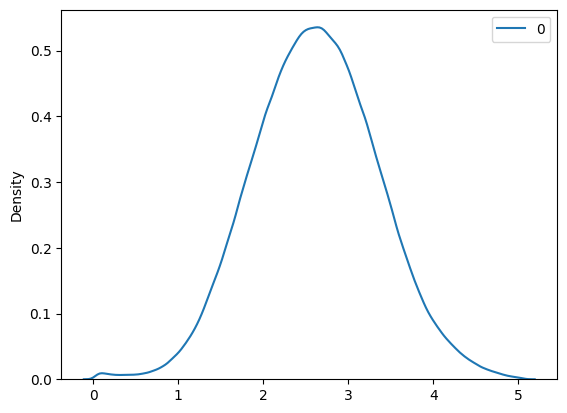

In [201]:
# apply yeo-johnson transformation

from sklearn.preprocessing import PowerTransformer

pt_target = PowerTransformer(standardize=False)

# transform the output column

trip_duration_trans = pt_target.fit_transform(final_df[['trip_duration']])

sns.kdeplot(trip_duration_trans)
plt.show()

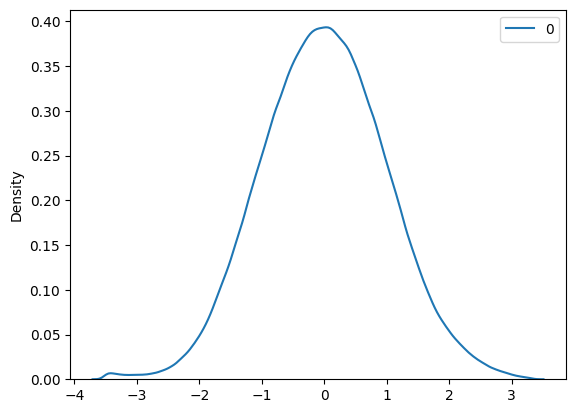

In [202]:
# apply yeo-johnson transformation

from sklearn.preprocessing import PowerTransformer

pt_target = PowerTransformer(standardize=True)

# transform the output column

trip_duration_trans = pt_target.fit_transform(final_df[['trip_duration']])

sns.kdeplot(trip_duration_trans)
plt.show()

In [203]:
pd.DataFrame(trip_duration_trans,columns=['target']).skew()

target    0.000407
dtype: float64

In [204]:
np.mean(trip_duration_trans),np.std(trip_duration_trans)

(-2.736593322065359e-16, 1.0)

## Passenger Count

In [205]:
# value counts in data

final_df['passenger_count'].value_counts()

passenger_count
1    1024854
2     208322
5      77354
3      59329
6      47888
4      28111
0         52
8          1
Name: count, dtype: int64

In [206]:
# impact of 0 passengers in data

final_df.loc[final_df['passenger_count'] == 0,'trip_duration'].agg(func=['min','max','median','mean','std'])

min        0.016667
max       54.050000
median     0.366667
mean       4.775962
std       10.968956
Name: trip_duration, dtype: float64

**The high std in the data shows a lot of variation in trip timings when there were no passengers in the cab**

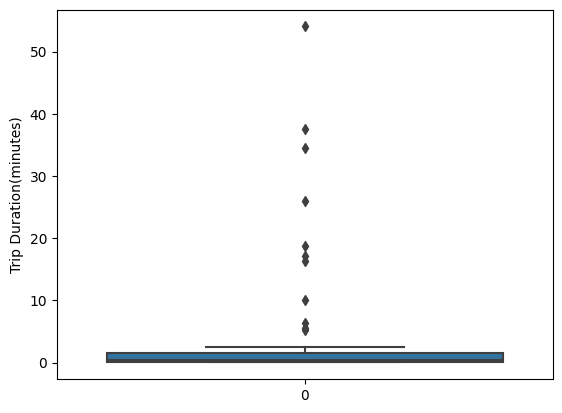

In [207]:
# boxplot

sns.boxplot(final_df.loc[(final_df['passenger_count'] == 0),'trip_duration'].reset_index(drop=True))
plt.ylabel('Trip Duration(minutes)')
plt.show()

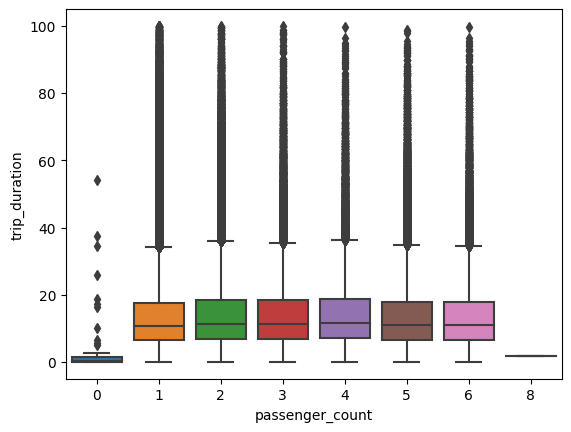

In [208]:
# plot for all passengers

sns.boxplot(data=final_df,x='passenger_count',y='trip_duration')
plt.show()

**The distribution of 0 passenger count is different from all others**  

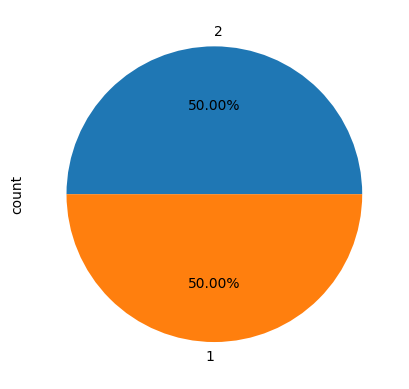

In [209]:
# vendor distribution for 0 passengers 

final_df.loc[(final_df['passenger_count'] == 0),'vendor_id'].value_counts().plot(kind='pie',autopct="%.2f%%")
plt.show()

**Equal distribution of the vendors for 0 passengers**

In [210]:
# hypothesis test for impact of passenger count on trip duration

from scipy.stats import f_oneway, levene

# test for homoscedasticity or similar variances

arr_count_1 = final_df.loc[(final_df['passenger_count'] == 1),'trip_duration'].values
arr_count_2 = final_df.loc[(final_df['passenger_count'] == 2),'trip_duration'].values
arr_count_3 = final_df.loc[(final_df['passenger_count'] == 3),'trip_duration'].values
arr_count_4 = final_df.loc[(final_df['passenger_count'] == 4),'trip_duration'].values
arr_count_5 = final_df.loc[(final_df['passenger_count'] == 5),'trip_duration'].values
arr_count_6 = final_df.loc[(final_df['passenger_count'] == 6),'trip_duration'].values

leven_stat,levene_p_val = levene(arr_count_1,arr_count_2,arr_count_3,arr_count_4,arr_count_5,arr_count_6)

alpha = 0.05

print(levene_p_val)

if levene_p_val > alpha:
    print('Fail to reject the H_0, The variance of samples are similar')
else:
    print('Reject the H_0,the variances are different')

1.9077030618275662e-134
Reject the H_0,the variances are different


**ANOVA test cannot be performed because the relationship in heteroscedastic in nature/ having unequal variances**


1. Can not possibly explain why trips were recorded when there were no passengers on board.
2. Only a small percent of data available for testing

In [211]:
# std of trip duration based on passenger count

final_df.groupby('passenger_count')['trip_duration'].std()

passenger_count
0    10.968956
1    10.507430
2    11.271044
3    10.892414
4    11.354504
5    10.710875
6    10.713153
8          NaN
Name: trip_duration, dtype: float64

In [212]:
# shape of data before removal

final_df.shape[0]

1445911

In [213]:
# remove the rows of data where passenger count is 8

final_df = final_df.drop(index=final_df[final_df['passenger_count'] == 8].index)

final_df.shape

(1445910, 11)

In [214]:
# unique values in the passenger count column

np.sort(final_df['passenger_count'].unique())

array([0, 1, 2, 3, 4, 5, 6])

## Store and Fwd Flag

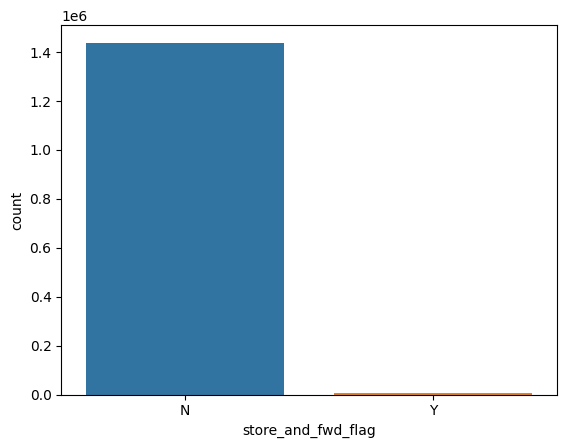

In [215]:
# distribution of column

sns.countplot(data=final_df,x='store_and_fwd_flag')
plt.show()

**The column is highly imabalanced**

> Removal of this column seems to be a logical approach

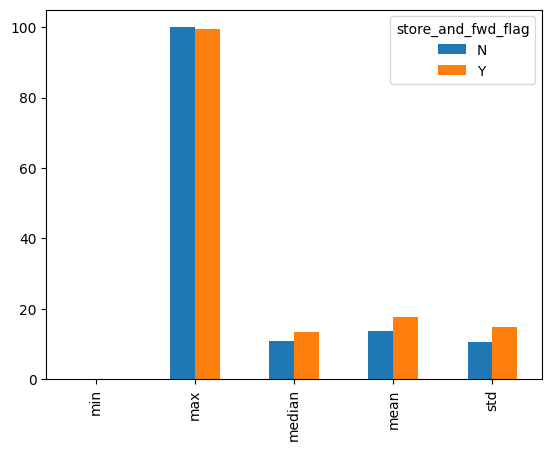

In [216]:
# statistical summary related to target

final_df.groupby('store_and_fwd_flag')['trip_duration'].agg(func=['min','max','median','mean','std']).T.plot(kind='bar')
plt.show()

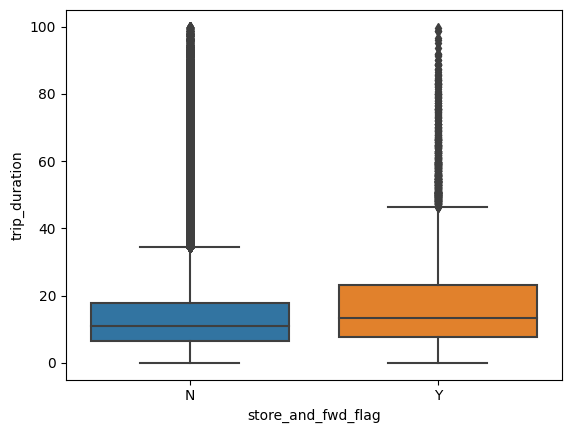

In [217]:
# plot boxplots

sns.boxplot(data=final_df,x='store_and_fwd_flag',y='trip_duration')
plt.show()

In [218]:
# percentage distribution

final_df['store_and_fwd_flag'].value_counts(normalize=True) * 100

store_and_fwd_flag
N    99.449897
Y     0.550103
Name: proportion, dtype: float64